# Project 1: Implementation of a perceptron model for regression / classification

*   Universidad de Monterrey
*   Cristopher Hildebrand Sánchez
*   Troy Alejandro Urdiales García
*   Diego Delgado Dragustinovis
*   Inteligencia Artificial 2
*   Dr Andrés Hernández Gutiérrez
*   Viernes 27 de Septiembre de 2024, San Pedro Garza García, Nuevo León
---



## Objetivo
Este proyecto consiste tanto en la exploración teórica como en la implementación práctica de un modelo de perceptrón utilizando TensorFlow.

## Investigación Teórica

### 1. Modelo de Perceptrón

#### Definición de una red neuronal de una sola neurona
Una red neuronal de una sola neurona, también conocida como **perceptrón**, es el tipo más básico de red neuronal artificial. Se compone de varios componentes esenciales que permiten procesar entradas y generar salidas. Según Alavala (2008) en *Fuzzy Logic and Neural Networks*, los componentes clave de un perceptrón son:

- **Entradas (Inputs)**: Representan las características o variables de los datos de entrada. Pueden ser valores numéricos que describen aspectos importantes de los datos.

- **Pesos (Weights)**: Cada entrada está asociada con un peso que define la importancia de esa entrada. Los pesos son ajustados durante el entrenamiento para mejorar la precisión del modelo.

- **Sesgo (Bias)**: Es una constante añadida al modelo que permite ajustar la salida de la red. Como señala Daniel (2007) en *Principles of Artificial Neural Networks*, el sesgo ayuda a desplazar la función de activación y asegura que el modelo pueda realizar predicciones incluso cuando todas las entradas son cero.

- **Función de activación (Activation Function)**: Transforma la suma ponderada de las entradas en una salida. Esto introduce la no linealidad en el modelo, como describe Hackeling (2017) en *Mastering Machine Learning with Scikit-learn*. Las funciones de activación comunes en el perceptrón son la función escalón, la sigmoide o la tangente hiperbólica.

- **Salida (Output)**: Es el resultado final del perceptrón después de que la función de activación procesa las entradas ponderadas. En clasificación binaria, la salida será 0 o 1, dependiendo de los valores de las entradas.

#### Clasificación binaria y el límite de decisión
El perceptrón es especialmente útil para tareas de **clasificación binaria**, donde se asignan datos a una de dos categorías. El **límite de decisión** es la división matemática que separa el espacio de entrada en dos regiones, cada una representando una categoría diferente. Como explica Hackeling (2017), el perceptrón ajusta sus pesos y sesgo para aprender un límite de decisión, que puede ser una línea en un espacio 2D o un hiperplano en dimensiones superiores. La ecuación del límite de decisión es:

<center> $w_1x_1 + w_2x_2 + \dots + w_nx_n + b = 0$ </center>

Si la suma ponderada de las entradas más el sesgo es mayor que 0, el perceptrón clasifica el dato como una categoría (por ejemplo, 1); si es menor que 0, lo clasifica en la otra (0). Dobson (2023), en *The Birth of Computer Vision*, explica que este concepto fue esencial en las primeras aplicaciones de la visión por computadora, donde se utilizaban límites de decisión para separar imágenes o características visuales en diferentes categorías.

### 2. Funciones de activación

La elección de la **función de activación** en un modelo de perceptrón depende del tipo de problema que se quiera resolver. Para la **clasificación**, las funciones de activación comunes son la **sigmoide** y la **tangente hiperbólica** (*tanh*), ya que introducen no linealidad en el modelo y permiten la clasificación en más de dos categorías.

- **Función sigmoide**: Transforma la salida en un valor entre 0 y 1, lo que la hace ideal para tareas de clasificación binaria. Según Hackeling (2017), la función sigmoide se define como:
<center>$\sigma(z) = \frac{1}{1 + e^{-z}}$</center>
Esta función es especialmente útil cuando se necesita una probabilidad como salida, ya que la salida de la sigmoide puede interpretarse como la probabilidad de pertenecer a una clase.

- **Función tangente hiperbólica (Tanh)**: La función **tanh** es una versión escalada de la sigmoide que transforma la salida en un valor entre -1 y 1. Esto puede ser beneficioso en algunas tareas de clasificación, ya que los valores negativos pueden tener un significado específico. Como señala Daniel (2007), la **tanh** tiene la ventaja de que su salida está centrada en cero, lo que puede acelerar el proceso de aprendizaje.

  La función **tanh** se define como:
  <center> $\tanh(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}$</center>
  
  En comparación con la sigmoide, **tanh** permite una mayor amplitud de valores, lo que puede ser útil para problemas donde se requiere una mayor sensibilidad en las predicciones.

### 3. Aplicación de caso de uso

Un ejemplo real donde se puede aplicar un modelo de perceptrón es en la **detección de spam en correos electrónicos**. El objetivo es clasificar los correos electrónicos en dos categorías: "spam" o "no spam" (clasificación binaria). Según Hackeling (2017), el perceptrón puede ser entrenado utilizando características de los correos electrónicos, como la frecuencia de ciertas palabras, la presencia de enlaces o imágenes, o el remitente.

El proceso de aplicación incluiría:
1. **Entradas**: Características numéricas derivadas del contenido del correo electrónico.

2. **Pesos**: Ajustados para darle más o menos importancia a ciertas características, como palabras clave que son comunes en correos de spam.

3. **Función de activación**: Podría ser una sigmoide para generar una probabilidad de que el correo sea spam.

4. **Límite de decisión**: El modelo ajusta su límite de decisión para determinar si un correo cae en la categoría de spam o no, en función de las características evaluadas.

Como Dobson (2023) menciona en *The Birth of Computer Vision*, los perceptrones fueron utilizados en aplicaciones tempranas para la clasificación de imágenes, lo que se puede considerar un paralelo a la clasificación de correos electrónicos, ya que ambos se centran en dividir un conjunto de datos en dos categorías.

## Implementación práctica usando TensorFlow en Python

### 1. Import standard libraries

Importación de las librerías necesarias para el proyecto.

In [31]:
# Importa la biblioteca pandas, utilizada para manipulación y análisis de datos.
import pandas as pd

# Importa la biblioteca Plotly Express, una herramienta para crear gráficos interactivos.
import plotly.express as px

# Importa Seaborn, una biblioteca basada en Matplotlib para crear gráficos estadísticos.
import seaborn as sns

# Importa Matplotlib para crear gráficos de visualización de datos en 2D.
import matplotlib.pyplot as plt

# Importa la biblioteca NumPy, que se usa para operaciones matemáticas y manejo de arreglos de grandes dimensiones.
import numpy as np

# Importa TensorFlow, una biblioteca de machine learning utilizada para construir y entrenar modelos de redes neuronales.
import tensorflow as tf

# Importa la función train_test_split de scikit-learn, que divide un conjunto de datos en subconjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split

# Importa StandardScaler de scikit-learn, que se utiliza para estandarizar características eliminando la media y escalando a la unidad de varianza.
from sklearn.preprocessing import StandardScaler

# Importa ConfusionMatrixDisplay de scikit-learn, que genera una visualización de una matriz de confusión para evaluar la calidad de un modelo de clasificación.
from sklearn.metrics import ConfusionMatrixDisplay

Cargar los datos en un dataframe bajo el nombre data.

In [32]:
# Leer el archivo CSV llamado 'typedCSV.csv' utilizando la función read_csv de pandas.
# La función read_csv carga los datos del archivo CSV en un DataFrame de pandas.
data = pd.read_csv('typedCSV.csv')

Se hace una copia del dataframe data bajo el nombre de df.

In [33]:
# Generar un nuevo dataframe (df), copia de data.
df = data

Este DataFrame esta estructurado de la siguiente manera:

1. **Columna "label"**: Esta primera columna contiene etiquetas numéricas que representan la categoría de cada imagen. De 0 a 9 son números, 10 a 35 letras en minúscula y 36 a 61 letras en mayúscula.

2. **Columnas "pixel"**: Las siguientes columnas, etiquetadas como "pixel_0", "pixel_1", "pixel_2", etc., contienen los valores de los píxeles de las imágenes. Los valores de estos píxeles van de 0 a 255, lo que indica que las imágenes están en escala de grises, donde 0 representa el color negro y 255 representa el color blanco.

3. **Tamaño de las imágenes**: El DataFrame tiene un total de 784 columnas de píxeles (desde "pixel_0" hasta "pixel_783"). Este conjunto de datos corresponde a imágenes de tamaño 28x28, donde cada fila representa los píxeles de una imagen de esa dimensión, "aplanada" en un solo vector de 784 valores.

4. **Cantidad de filas**: El índice muestra que hay al menos 62,992 filas en el DataFrame. Esto sugiere que hay 62,992 imágenes en este conjunto de datos, con sus correspondientes etiquetas en la columna "label".

In [34]:
# Contenido de dataframe df.
df

,label,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,...,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783
0,0,255,255,255,255,255,255,255,255,253,...,250,255,255,251,255,255,255,255,255,255
1,0,255,255,255,255,255,255,255,255,255,...,254,255,255,255,249,253,255,255,255,255
2,0,255,255,255,255,255,255,255,255,254,...,255,255,255,255,255,255,255,255,255,255
3,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,0,255,253,255,253,251,255,254,255,255,...,255,255,253,253,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62987,61,255,252,254,255,253,255,255,253,255,...,246,255,252,255,252,255,255,255,255,255
62988,61,255,254,254,254,253,255,252,254,255,...,252,255,254,250,255,255,255,255,255,255
62989,61,255,252,255,255,254,255,254,255,254,...,252,255,254,250,255,255,255,255,255,255
62990,61,252,254,255,255,255,254,255,248,255,...,245,255,251,255,253,255,255,255,255,255


Se genera una serie de imágenes a partir de un conjunto de datos almacenados en el DataFrame `df`. La visualización de las imágenes se realiza en bloques, comenzando desde diferentes índices indicados por los valores de la lista `saltos`.

- **`axes[index % imagenes_por_renglon]`** se asegura de que las imágenes se distribuyan correctamente en los subgráficos.

- **`plt.tight_layout()`** ajusta los subgráficos para que no se solapen.

- **`plt.show()`** muestra las imágenes en pantalla.

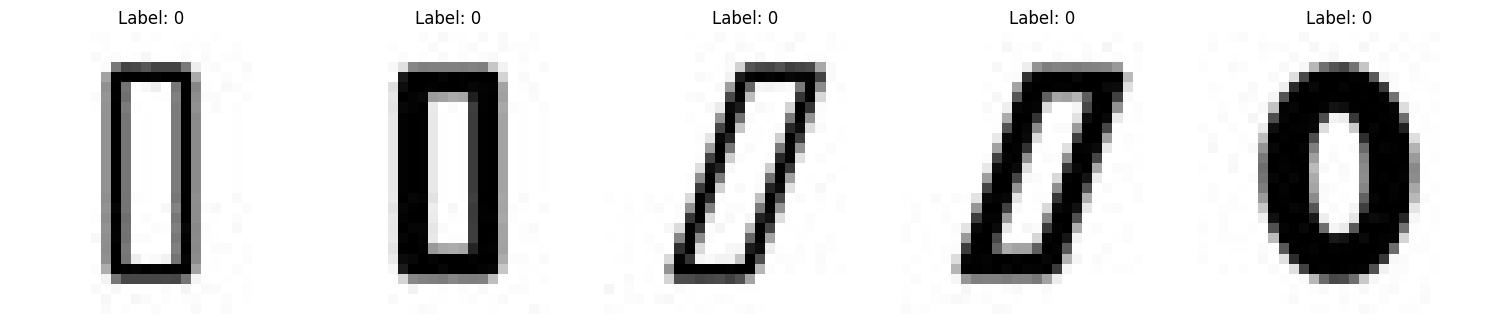

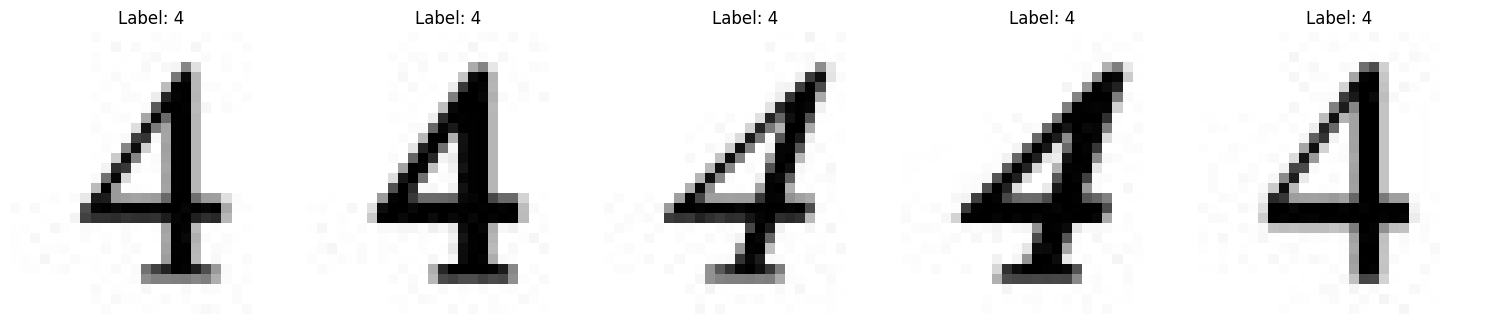

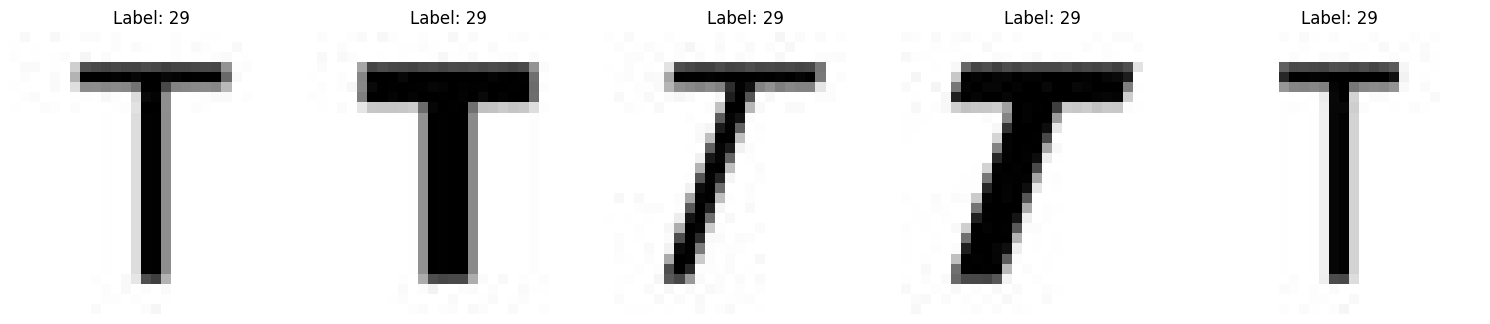

In [35]:
# Define cuántas imágenes se mostrarán por fila.
imagenes_por_renglon = 5

# Define cuántas imágenes se mostrarán en total por cada grupo o conjunto.
total_imagenes_por_grupo = 5

# Lista de saltos, donde cada número indica un punto de partida diferente dentro del DataFrame para seleccionar imágenes.
saltos = [0, 5000, 30000]

# Bucle que itera sobre cada valor de la lista 'saltos'. Esto permite generar gráficos para diferentes grupos de imágenes,
# comenzando en los índices indicados por los valores de 'saltos'.
for salto in saltos:

    # Crea una figura con subgráficos (subplots). Se generan 5 columnas (una por cada imagen por fila).
    # 'figsize' establece el tamaño de la figura (15 unidades de ancho y 5 unidades de alto).
    fig, axes = plt.subplots(nrows=1, ncols=imagenes_por_renglon, figsize=(15, 5))

    # Itera sobre las filas del DataFrame comenzando desde el índice 'salto'.
    # 'enumerate' da un índice 'index' para cada iteración.
    for index, (i, row) in enumerate(df.iloc[salto:].iterrows()):

        # Extrae los valores de cada fila (excluyendo la primera columna que puede ser un identificador o etiqueta).
        pixels = row[1:].values

        # Convierte los valores de la fila en una matriz de 28x28, que representa una imagen en escala de grises.
        image_array = pixels.reshape(28, 28)

        # Selecciona el subplot correspondiente al índice actual.
        ax = axes[index % imagenes_por_renglon]

        # Muestra la imagen en el subplot usando una escala de grises.
        ax.imshow(image_array, cmap='gray')

        # Establece el título del gráfico usando el valor de la etiqueta (asumido en la columna 'label' del DataFrame).
        ax.set_title(f"Label: {row['label']}")

        # Apaga los ejes para que no se muestren las marcas o números alrededor de la imagen.
        ax.axis('off')

        # Rompe el bucle una vez que se han mostrado el número total de imágenes especificado en 'total_imagenes_por_grupo'.
        if index + 1 == total_imagenes_por_grupo:
            break

    # Ajusta el diseño de los subplots para que no se superpongan.
    plt.tight_layout()

    # Muestra la figura con las imágenes generadas.
    plt.show()

La generación de un histograma permite ver la distribución de las clases en el conjunto de datos. Si es un conjunto de datos balanceado, las barras del histograma deberían tener alturas similares.

Observando el histograma en la imagen se muestra una distribución **uniforme** para la mayoría de las clases (del valor 0 al 61), con una ligera elevación en las clases correspondientes a los números (0-9) y las letras mayúsculas (36-61).

La frecuencia de la mayoría de las clases está alrededor de 6,000, lo que indica que el conjunto de datos parece estar **balanceado** entre las clases. No parece haber una clase dominante que tenga significativamente más o menos ejemplos que las demás, excepto por la leve elevación en los extremos (números y letras mayúsculas).

Sin embargo como el objetivo de este modelo es identificar entre un número y una letra, si hay un desbalance con las proporciones de datos, ya que la cantidad de muestras de letras es considerablemente mayor a la de los números.

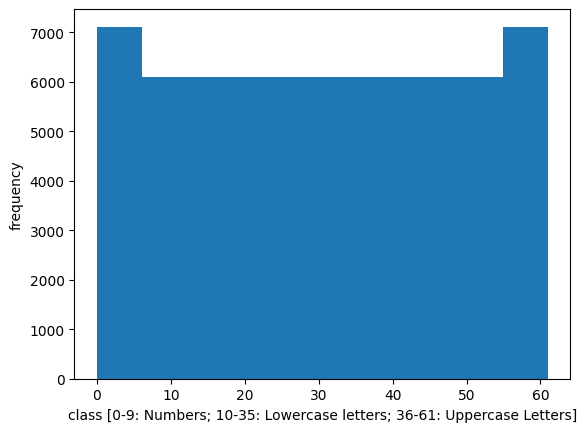

In [36]:
# Genera un histograma que muestra la frecuencia de aparición de cada clase en la columna 'label' del DataFrame.
plt.hist(df['label'])

# Establece la etiqueta del eje x, donde se describen los rangos de valores que corresponden a diferentes categorías:
# 0-9 para números, 10-35 para letras minúsculas, y 36-61 para letras mayúsculas.
plt.xlabel('class [0-9: Numbers; 10-35: Lowercase letters; 36-61: Uppercase Letters]')

# Establece la etiqueta del eje y para indicar que se muestra la frecuencia de cada clase.
plt.ylabel('frequency')

# Muestra el histograma generado.
plt.show();


Con el fin de corregir la discrepancia, se optó por eliminar del análisis los datos correspondientes a las letras mayúsculas. No obstante, la diferencia en la cantidad de ejemplos seguía siendo el doble. Para equilibrar esta diferencia, se duplicaron los datos de los números, aplicando una reducción en la intensidad de los píxeles de las imágenes duplicadas.

Dado que se trata de un modelo de clasificación, se realizó una transformación en la variable `label`, asignando el valor 0 a los datos alfabéticos y el valor 1 a los datos numéricos.

In [37]:
# Filtra el DataFrame original para que solo contenga etiquetas (label) entre 0 y 35.
# Esto incluye números (0-9) y letras minúsculas (10-35).
df = df[(df['label'] >= 0) & (df['label'] <= 35)]

# Crea un subconjunto del DataFrame que solo contiene filas con etiquetas entre 0 y 9 (es decir, los números).
df_numeros = df[(df['label'] >= 0) & (df['label'] <= 9)]

# Escala los valores de los píxeles de las imágenes en df_numeros multiplicándolos por 0.90.
# Esto reduce la intensidad de los píxeles en un 10%.
# El uso de iloc[:, :-1] asegura que solo se modifiquen las columnas de los píxeles, no la columna 'label'.
df_numeros.iloc[:, :-1] = df_numeros.iloc[:, :-1] * 0.90

# Concatenamos el DataFrame original con df_numeros (que ahora contiene los números con píxeles escalados).
# Esto devuelve al DataFrame original las imágenes de números, pero con la nueva escala en los píxeles.
df = pd.concat([df, df_numeros])

# Definimos una función que transforma las etiquetas (label) en una tarea binaria:
# - Si la etiqueta está entre 0 y 9 (números), la etiqueta se transforma a 1.
# - Si la etiqueta está entre 10 y 35 (letras minúsculas), la etiqueta se transforma a 0.
def transform_label(label):
    if 0 <= label <= 9:
        return 1
    elif 10 <= label <= 35:
        return 0

# Aplicamos la función 'transform_label' a la columna 'label' del DataFrame,
# para convertir todas las etiquetas en 1 (números) o 0 (letras minúsculas).
df['label'] = df['label'].apply(transform_label)


Se repitieron los pasos anteriores con el fin de evaluar los beneficios de las modificaciones aplicadas a los datos.

Al observar el DataFrame, se puede notar que la cantidad de filas disminuyó debido a la eliminación de las letras mayúsculas. Sin embargo, el número total de filas aumentó por la duplicación de los datos numéricos.

Además, la columna `label` ya refleja la clasificación binaria, donde los valores 0 corresponden a los caracteres alfabéticos y los valores 1 a los caracteres numéricos.

In [38]:
# Contenido actualizado de dataframe df.
df

,label,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,...,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783
0,1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,253.0,...,250.0,255.0,255.0,251.0,255.0,255.0,255.0,255.0,255.0,255
1,1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,254.0,255.0,255.0,255.0,249.0,253.0,255.0,255.0,255.0,255
2,1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255
3,1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255
4,1,255.0,253.0,255.0,253.0,251.0,255.0,254.0,255.0,255.0,...,255.0,255.0,253.0,253.0,255.0,255.0,255.0,255.0,255.0,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10155,1,229.5,229.5,229.5,229.5,229.5,229.5,229.5,229.5,229.5,...,229.5,229.5,229.5,229.5,229.5,229.5,229.5,229.5,229.5,255
10156,1,229.5,229.5,228.6,229.5,229.5,225.0,229.5,225.9,227.7,...,229.5,229.5,229.5,229.5,229.5,229.5,229.5,229.5,229.5,255
10157,1,229.5,225.9,229.5,229.5,228.6,229.5,227.7,229.5,226.8,...,229.5,229.5,229.5,229.5,229.5,229.5,229.5,229.5,229.5,255
10158,1,229.5,229.5,229.5,229.5,229.5,229.5,229.5,229.5,229.5,...,229.5,229.5,229.5,229.5,229.5,229.5,229.5,229.5,229.5,255


Se genera nuevamente un histograma, pero en esta ocasión las frecuencias representan la cantidad de datos alfabéticos y numéricos, clasificados con los valores 0 y 1, respectivamente.

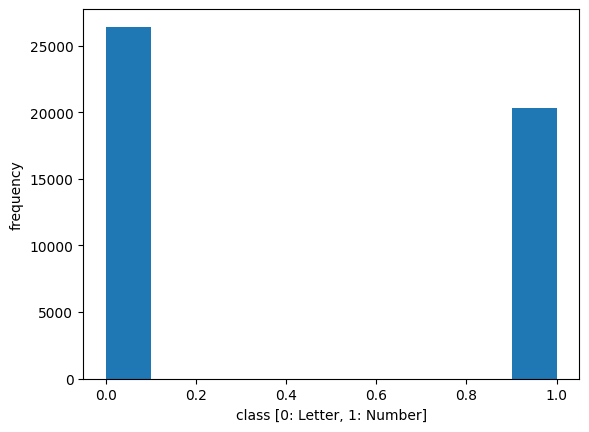

In [39]:
# Genera un histograma de la columna 'label' del DataFrame, que contiene la clasificación de los datos (0 para letras y 1 para números).
plt.hist(df['label'])

# Establece la etiqueta del eje X, indicando que los valores 0 representan letras y los valores 1 representan números.
plt.xlabel('class [0: Letter, 1: Number]')

# Establece la etiqueta del eje Y, indicando que se muestra la frecuencia (número de ocurrencias) de cada clase en el conjunto de datos.
plt.ylabel('frequency')

# Muestra el histograma en pantalla.
plt.show();


Al generar un resumen estadístico generado por `df.describe()`, se pueden hacer varias observaciones sobre los resultados:

1. **Cantidad de filas (`count`)**:
   - Todas las columnas, incluidas las etiquetas (`label`) y los píxeles (`pixel_0`, `pixel_1`, etc.), tienen **46,736 filas**, lo que indica que no hay valores nulos o faltantes en estas columnas.

2. **Media (`mean`)**:
   - La **media** de las etiquetas (`label`) es aproximadamente **0.434**, lo que sugiere que hay una proporción ligeramente mayor de la clase etiquetada como 0 (letras) en comparación con la clase etiquetada como 1 (números). Esto podría implicar un pequeño desequilibrio en los datos.
   - Las medias de los valores de los píxeles están alrededor de **249**, lo que significa que la mayoría de los píxeles están muy cerca del valor máximo de intensidad (255), lo que sugiere que las imágenes tienen áreas predominantemente claras o blancas.

3. **Desviación estándar (`std`)**:
   - La **desviación estándar** para las etiquetas es **0.495**, lo que indica una cierta variabilidad entre las clases, pero dado que las etiquetas son 0 o 1, esta variabilidad es esperable.
   - Las desviaciones estándar de los valores de los píxeles están alrededor de **10.4**, lo que indica que la mayoría de los píxeles tienen intensidades cercanas a la media, con una variación relativamente pequeña.

4. **Mínimo y máximo (`min` y `max`)**:
   - El **valor mínimo** de las etiquetas es **0** y el máximo es **1**, lo cual es correcto porque estamos trabajando con un modelo de clasificación binaria.
   - Los valores de los píxeles varían entre **220** y **255**, lo que indica que todas las imágenes son bastante claras (en escala de grises), ya que los valores de los píxeles no alcanzan intensidades más oscuras (por debajo de 220).

5. **Percentiles (25%, 50%, 75%)**:
   - La mayoría de los valores de los píxeles están muy cerca de **255**, con los percentiles 25%, 50%, y 75% indicando que gran parte de la imagen es clara o blanca.
   - El percentil 50% de las etiquetas es **0**, lo que confirma que la clase de las letras es ligeramente mayoritaria en el conjunto de datos.

In [40]:
# Resumen estadístico del DataFrame df.
df.describe()

,label,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,...,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783
count,46736.000000,46736.000000,46736.000000,46736.000000,46736.000000,46736.000000,46736.000000,46736.000000,46736.000000,46736.000000,...,46736.000000,46736.000000,46736.000000,46736.000000,46736.000000,46736.000000,46736.000000,46736.000000,46736.000000,46736.000000
mean,0.434783,249.096868,248.896977,249.014295,248.995380,248.982641,248.994948,248.925094,249.121185,248.630799,...,248.972456,248.928997,248.869054,249.026397,248.892963,248.996863,249.433728,249.433484,249.441448,254.994308
std,0.495734,10.472099,10.489111,10.466214,10.464644,10.458620,10.484439,10.467897,10.459722,10.568172,...,10.556514,10.588856,10.627677,10.519105,10.563878,10.569009,10.510894,10.509915,10.512222,0.097742
min,0.000000,223.200000,220.500000,222.300000,220.500000,220.500000,220.500000,220.500000,222.300000,222.300000,...,216.000000,218.700000,220.500000,220.500000,215.100000,221.400000,225.000000,225.000000,226.800000,247.000000
25%,0.000000,252.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,252.000000,251.000000,...,251.000000,251.000000,250.000000,252.000000,251.000000,252.000000,255.000000,255.000000,255.000000,255.000000
50%,0.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
75%,1.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
max,1.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


Se establece una **semilla** para los generadores de números aleatorios dentro de TensorFlow. Esto para que la generación de datos de entrenamiento aleatorios produzca siempre los **mismos resultados**. Esto permite que los experimentos sean **reproducibles**.

In [41]:
# Asignar valores aleatoriamente reproducibles.
tf.random.set_seed(4500)

Se separan las **características** (datos de entrada) y las **etiquetas** (salidas o targets) antes de entrenar un modelo. `y` contendrá las etiquetas (0 y 1) que se usarán como las clases objetivo para la clasificación. Esta variable será el **target** que el modelo tratará de predecir usando las características almacenadas en `X`.



In [42]:
# Elimina la columna 'label' del DataFrame 'df' para obtener solo las características (píxeles) y guardarlas en la variable 'X'.
# Esto significa que 'X' contiene los valores de los píxeles de las imágenes, pero no incluye la etiqueta de clasificación.
X = df.drop(["label"], axis=1)

# Extrae la columna 'label' del DataFrame 'df' y la guarda en la variable 'y'.
# Esta variable 'y' contiene las etiquetas (0 para letras, 1 para números) que se usarán como objetivo (o target) en el modelo de clasificación.
y = df['label']


Se preparan los datos para entrenamiento y prueba en un modelo de clasificación binaria. Se divide los datos de números y letras, se combinan en conjuntos de entrenamiento y prueba, y se mezclan aleatoriamente para evitar cualquier sesgo en el orden de los datos. Además, se imprime la distribución de las etiquetas para asegurar que las clases están bien balanceadas en ambos conjuntos.

La división de los datos por tipo de carácter se realizó por separado debido a la discrepancia en la frecuencia de los datos. Esto permitió asegurar que el 20% de cada tipo de dato se destinara correctamente al conjunto de prueba.

In [43]:
# Importa la función shuffle de scikit-learn, que se utiliza para mezclar aleatoriamente los datos.
from sklearn.utils import shuffle

# Filtra las características (X) y etiquetas (y) para obtener solo los datos correspondientes a los números (donde y == 1).
X_numeros = X[y == 1]
y_numeros = y[y == 1]

# Filtra las características (X) y etiquetas (y) para obtener solo los datos correspondientes a las letras (donde y == 0).
X_letras = X[y == 0]
y_letras = y[y == 0]

# Divide el conjunto de datos de números en conjuntos de entrenamiento (80%) y prueba (20%).
# La opción shuffle=True asegura que los datos se mezclen aleatoriamente antes de la división.
# random_state=42 asegura que el proceso de aleatorización sea reproducible.
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_numeros, y_numeros, test_size=0.2, random_state=42, shuffle=True)

# Divide el conjunto de datos de letras en conjuntos de entrenamiento (80%) y prueba (20%), con las mismas configuraciones que el paso anterior.
X_train_letras, X_test_letras, y_train_letras, y_test_letras = train_test_split(X_letras, y_letras, test_size=0.2, random_state=42, shuffle=True)

# Combina los conjuntos de entrenamiento de números y letras en un solo DataFrame para las características y las etiquetas.
X_train = pd.concat([X_train_num, X_train_letras], axis=0)
y_train = pd.concat([y_train_num, y_train_letras], axis=0)

# Combina los conjuntos de prueba de números y letras en un solo DataFrame para las características y las etiquetas.
X_test = pd.concat([X_test_num, X_test_letras], axis=0)
y_test = pd.concat([y_test_num, y_test_letras], axis=0)

# Mezcla aleatoriamente los datos de entrenamiento y las etiquetas correspondientes para evitar cualquier sesgo en el orden de los datos.
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Mezcla aleatoriamente los datos de prueba y las etiquetas correspondientes.
X_test, y_test = shuffle(X_test, y_test, random_state=42)

# Imprime la distribución de etiquetas en el conjunto de entrenamiento.
print("Distribución en el conjunto de entrenamiento:")
print(y_train.value_counts())

# Imprime la distribución de etiquetas en el conjunto de prueba.
print("\nDistribución en el conjunto de prueba:")
print(y_test.value_counts())


Distribución en el conjunto de entrenamiento:
label
0    21132
1    16256
Name: count, dtype: int64

Distribución en el conjunto de prueba:
label
0    5284
1    4064
Name: count, dtype: int64


Estandarizar los conjuntos de entrenamiento y prueba garantiza que todas las características tengan la misma escala. Estandarizar ayuda a que los modelos converjan más rápido y funcionen de manera más eficiente.

In [44]:
# Estandariza las características (features) del conjunto de datos.
# Crea una instancia del objeto StandardScaler, que estandariza los datos eliminando la media y escalando a la varianza unitaria.
scaler = StandardScaler()

# Ajusta el scaler al conjunto de entrenamiento y transforma (escalando) los datos de entrenamiento.
# La función fit_transform primero ajusta el scaler calculando la media y la desviación estándar en los datos de entrenamiento,
# y luego transforma estos datos utilizando esos parámetros.
X_train = scaler.fit_transform(X_train)

# Transforma el conjunto de prueba utilizando los mismos parámetros (media y desviación estándar) calculados a partir del conjunto de entrenamiento.
# Esto asegura que los datos de prueba se escalen de manera coherente con el conjunto de entrenamiento.
X_test = scaler.transform(X_test)


LabelEncoder convierte las etiquetas de entrenamiento y prueba en valores numéricos, asegurando que el modelo pueda procesar estas etiquetas de manera consistente. Aunque en este caso ya parece que las etiquetas son números, es un paso común en la preparación de datos categóricos, particularmente cuando se trabaja con etiquetas de texto o categorías múltiples.

In [45]:
# Importa LabelEncoder desde la biblioteca scikit-learn.
# LabelEncoder se utiliza para convertir etiquetas categóricas en números enteros.
from sklearn.preprocessing import LabelEncoder

# Crea una instancia de LabelEncoder.
# Este codificador se encargará de transformar las etiquetas (y_train, y_test) en valores numéricos.
label_encoder = LabelEncoder()

# Ajusta el codificador a las etiquetas del conjunto de entrenamiento y las transforma.
# fit_transform ajusta el codificador a los datos de entrenamiento (es decir, identifica las etiquetas únicas)
# y las convierte en números enteros. Por ejemplo, si hay dos clases, 0 y 1, las etiquetas se mantendrán.
y_train = label_encoder.fit_transform(y_train)

# Transforma las etiquetas del conjunto de prueba usando el mismo ajuste (sin volver a ajustar).
# Al utilizar transform en lugar de fit_transform, aseguramos que se aplique la misma transformación
# a los datos de prueba que la aprendida con los datos de entrenamiento.
y_test = label_encoder.transform(y_test)


Se define el primer modelo de red neuronal simple con una capa de entrada de 784 características y una capa de salida de 1 neurona que usa la activación sigmoide. El modelo es adecuado para problemas de clasificación binaria, ya que la activación sigmoide produce una probabilidad de clase entre 0 y 1.

In [46]:
# Define una función que crea y devuelve un modelo de red neuronal utilizando la activación 'sigmoid'.
# Este modelo será un modelo secuencial en Keras, lo que significa que las capas se apilan de manera secuencial.
def get_modelSigmoid():

    # Crea un modelo secuencial en Keras llamado modelSigmoid.
    # El modelo secuencial es apropiado para apilar capas una sobre otra de manera lineal.
    modelSigmoid = tf.keras.Sequential([

        # La primera capa es una capa de entrada que acepta vectores de entrada con 784 características,
        # lo que es correspondiente al conjunto de datos de imágenes de 28x28 píxeles aplanadas.
        tf.keras.layers.InputLayer(shape=(784,)),

        # La segunda capa es una capa densa (fully connected layer) con una única neurona.
        # Utiliza la función de activación 'sigmoid', que es apropiada para problemas de clasificación binaria,
        # ya que convierte la salida en un valor entre 0 y 1, que puede interpretarse como una probabilidad.
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Devuelve el modelo creado, listo para ser compilado y entrenado.
    return modelSigmoid


Se define un segundo modelo de red neuronal simple con una capa de entrada de 784 características y una capa de salida de 1 neurona que usa la activación tanh. Esta activación convierte los valores de salida en un rango entre -1 y 1, lo cual puede ser útil en ciertos casos para capturar relaciones no lineales de manera más eficaz.

In [47]:
# Define una función que crea y devuelve un modelo de red neuronal utilizando la activación 'tanh'.
# Este modelo será un modelo secuencial en Keras, lo que significa que las capas se apilan de manera secuencial.
def get_modelTanh():

    # Crea un modelo secuencial en Keras llamado modelTanh.
    # El modelo secuencial permite agregar capas de manera lineal (una tras otra).
    modelTanh = tf.keras.Sequential([

        # La primera capa es una capa de entrada que acepta vectores de entrada con 784 características,
        # esto corresponde a imágenes de 28x28 píxeles aplanadas en un vector de 784 elementos.
        tf.keras.layers.InputLayer(shape=(784,)),

        # La segunda capa es una capa densa (fully connected layer) con una única neurona.
        # Utiliza la función de activación 'tanh', que convierte la salida de la neurona en un valor entre -1 y 1,
        # lo cual es útil en ciertos tipos de modelos que se benefician de esta no linealidad.
        tf.keras.layers.Dense(1, activation='tanh')
    ])

    # Devuelve el modelo creado, listo para ser compilado y entrenado.
    return modelTanh


El uso de `.summary()` es útil para obtener una visión clara de la estructura del modelo, el número de parámetros entrenables y cómo fluyen los datos a través de las capas. Esto es especialmente útil para verificar que la arquitectura del modelo es la esperada antes de entrenarlo.

- **Capa Dense**: La capa densa tiene una salida de tamaño `(None, 1)`, lo que significa que genera un único valor de salida para cada entrada (donde "None" se refiere al tamaño flexible del batch de entrada).

- **Parámetros entrenables**: El número de parámetros entrenables en la capa densa es 785. Esto se debe a que:
   - Hay **784 pesos** correspondientes a cada una de las características de entrada (una para cada píxel de la imagen).
   - Hay **1 bias** adicional.
   - El número total de parámetros es entonces **784 + 1 = 785**.

In [48]:
# Llama a la función get_modelSigmoid() para crear una instancia del modelo con activación sigmoide.
modelSigmoid = get_modelSigmoid()

# El método summary() proporciona una descripción detallada de las capas del modelo, incluyendo el número de parámetros entrenables.
modelSigmoid.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │             785 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Llama a la función get_modelTanh() para crear una instancia del modelo con activación tanh.
modelTanh = get_modelTanh()

# El método summary() proporciona una descripción detallada de las capas del modelo, incluyendo el número de parámetros entrenables.
modelTanh.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1)                   │             785 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

El modelo se configura bajo tres aspectos clave:

* Optimizador: Adam, que ajusta automáticamente la tasa de aprendizaje.

* Función de pérdida: binary_crossentropy, adecuada para clasificaciones binarias, que mide la diferencia entre las predicciones y los valores reales.

* Métrica: accuracy, que mide la proporción de predicciones correctas para evaluar el rendimiento del modelo.

In [50]:
# Compila el modelo modelSigmoid, definiendo el optimizador, la función de pérdida y las métricas.
modelSigmoid.compile(
    optimizer='adam',                   # Se utiliza el optimizador 'adam', que es una versión adaptativa del optimizador basado en gradientes.
    loss='binary_crossentropy',          # La función de pérdida 'binary_crossentropy' es adecuada para problemas de clasificación binaria, ya que mide la diferencia entre la predicción y la etiqueta verdadera (0 o 1).
    metrics=['accuracy']                 # Se mide la precisión ('accuracy') como métrica de rendimiento. Esto calculará la proporción de predicciones correctas.
)


Previo al entrenamiento se evalúa el modelo utilizando los datos de prueba y muestra la precisión obtenida.

La precisión en el conjunto de prueba es **0.6459** (alrededor del 64.59%), lo que indica que el modelo está prediciendo correctamente cerca del **65%** de las veces. Esto es un rendimiento bastante bajo para un problema de clasificación binaria, ya que se esperaría una precisión cercana al **80%** o más.

La pérdida es **0.6583**, lo que también sugiere que el modelo tiene problemas para ajustarse a los datos. Un valor de pérdida alto indica que el modelo no está prediciendo correctamente y que las diferencias entre las predicciones y las etiquetas reales son grandes.

Después del entrenamiento debería de hacer una mejora de este resultado.

In [51]:
# Evalúa el modelo 'modelSigmoid' utilizando los datos de prueba (X_test, y_test).
# La función evaluate calcula la pérdida (loss) y la métrica de rendimiento (en este caso, la precisión) en el conjunto de prueba.
loss, accuracy = modelSigmoid.evaluate(X_test, y_test)

# Imprime la accuracy obtenida en el conjunto de prueba, con 4 decimales de precisión.
print(f"Test Accuracy: {accuracy:.4f}")


293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6459 - loss: 0.6583
Test Accuracy: 0.6527


Aquí comineza el entrenamiento del modelo sigmoide utilizando EarlyStopping para evitar el sobreentrenamiento. El entrenamiento se detendrá si la precisión de validación no mejora durante 10 épocas consecutivas, y los mejores pesos (los que lograron la mejor precisión de validación) serán restaurados automáticamente. Esto mejora la eficiencia del entrenamiento y evita que el modelo continúe entrenando cuando ya no está mejorando.

A partir de los resultados es posible observar del entrenamiento del modelo:

1. **Precisión del modelo (`accuracy`)**:
   - La precisión en los datos de entrenamiento mejora gradualmente, comenzando alrededor de **0.8748** en la primera época y alcanzando aproximadamente **0.9225** en la época 21. Esto indica que el modelo está aprendiendo bien de los datos de entrenamiento, ya que la precisión aumenta progresivamente.

2. **Pérdida (`loss`)**:
   - La pérdida en el conjunto de entrenamiento disminuye de **0.2889** en la primera época a **0.1907** en la época 21. Una disminución en la pérdida significa que el modelo está ajustándose mejor a los datos de entrenamiento a medida que avanza el entrenamiento.

3. **Precisión en el conjunto de validación (`val_accuracy`)**:
   - La precisión en el conjunto de validación comienza en **0.9131** y varía ligeramente, alcanzando un máximo de **0.9200**. Esto muestra que el modelo está generalizando bien, aunque no hay un gran aumento en la precisión de validación después de las primeras épocas. El modelo parece estabilizarse en torno a esta precisión.

4. **Pérdida en el conjunto de validación (`val_loss`)**:
   - La pérdida en el conjunto de validación disminuye hasta alrededor de **0.2031**. Una pérdida de validación baja sugiere que el modelo está haciendo predicciones precisas en los datos de validación y no está sobreajustando los datos de entrenamiento.

5. **Estabilidad y convergencia**:
   - El modelo parece haber **convergido** alrededor de las épocas 12 a 21, ya que la precisión en los datos de validación y entrenamiento se estabiliza.

In [52]:
# Importa la función EarlyStopping de Keras, que se utiliza para detener el entrenamiento cuando la métrica de validación deja de mejorar.
from keras.callbacks import EarlyStopping

# Definir el callback de EarlyStopping.
# - 'monitor' indica que se observará la métrica 'val_accuracy' (precisión en el conjunto de validación) para decidir cuándo detener el entrenamiento.
# - 'patience=10' especifica que el entrenamiento se detendrá si no hay mejoras en la precisión de validación durante 10 épocas consecutivas.
# - 'restore_best_weights=True' asegura que, cuando se detenga el entrenamiento, los pesos del modelo se restauren a aquellos que dieron el mejor rendimiento en la métrica de validación.
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Entrena el modelo 'modelSigmoid' usando los datos de entrenamiento (X_train, y_train).
# - 'epochs=500' indica que el entrenamiento se intentará ejecutar por hasta 500 épocas, pero el EarlyStopping puede detenerlo antes.
# - 'batch_size=32' especifica que se utilizarán lotes de 32 muestras en cada paso de entrenamiento.
# - 'validation_split=0.20' reserva el 20% del conjunto de entrenamiento para validación (los datos de validación no se utilizan para ajustar los pesos, solo para monitorear el rendimiento).
# - 'callbacks=[early_stop]' agrega el callback de EarlyStopping para que el entrenamiento se detenga automáticamente si el rendimiento en la validación deja de mejorar.
history = modelSigmoid.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.20, callbacks=[early_stop])


Epoch 1/500
935/935 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8748 - loss: 0.2889 - val_accuracy: 0.9131 - val_loss: 0.2177
Epoch 2/500
935/935 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9101 - loss: 0.2188 - val_accuracy: 0.9155 - val_loss: 0.2100
Epoch 3/500
935/935 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9138 - loss: 0.2106 - val_accuracy: 0.9170 - val_loss: 0.2070
Epoch 4/500
935/935 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9150 - loss: 0.2063 - val_accuracy: 0.9184 - val_loss: 0.2055
Epoch 5/500
935/935 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9167 - loss: 0.2035 - val_accuracy: 0.9182 - val_loss: 0.2047
Epoch 6/500
935/935 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9181 - loss: 0.2014 - val_accuracy: 0.9184 - val_loss: 0.2041
Epoch 7/500
935/935 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9191 - loss: 0.1998 - val_accuracy: 0.9192 - val_loss: 0.2038
Epoch 8/500
935/935 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9197 - loss: 0.1984 - val_accu

Se imprime la **mejor época** en la que se obtuvo la **máxima precisión de validación** durante el entrenamiento antes de que **EarlyStopping** detuviera el proceso. Esto es útil para evaluar en qué punto el modelo alcanzó su mejor rendimiento y cuán efectiva fue la técnica de EarlyStopping para prevenir el sobreentrenamiento.

La mejor época se alcanzó en la época 11, lo que indica que el modelo alcanzó su máximo rendimiento en el conjunto de validación relativamente rápido, lo que es positivo. Esto también sugiere que el modelo no necesitó muchas épocas para aprender las características relevantes de los datos.

La mejor precisión en validación fue 0.92 (92%). Esta es una precisión alta, lo que indica que el modelo es capaz de generalizar bien sobre los datos de validación y hacer predicciones correctas la gran mayoría de las veces.

In [53]:
# Calcula la mejor época obtenida durante el entrenamiento antes de que el EarlyStopping detuviera el proceso.
# 'early_stop.stopped_epoch' es la época en la que EarlyStopping detuvo el entrenamiento.
# Se resta 'early_stop.patience' y se suma 1 para obtener la época en la que se observó la mejor mejora en la métrica de validación.
best_epoch = early_stop.stopped_epoch - early_stop.patience + 1

# Imprime la mejor época en la que se obtuvo la mejor precisión en el conjunto de validación.
print(f"Mejor época: {best_epoch}")

# Obtiene la mejor precisión de validación observada durante el entrenamiento.
# Se utiliza 'max' para encontrar el valor más alto de 'val_accuracy' dentro del historial de entrenamiento.
best_val_accuracy = max(history.history['val_accuracy'])

# Imprime la mejor precisión en validación obtenida, formateada con 4 decimales.
print(f"Mejor precisión en validación: {best_val_accuracy:.4f}")


Mejor época: 11
Mejor precisión en validación: 0.9200


Se rafica la precisión en los conjuntos de entrenamiento y validación por cada época. Esto te permite visualizar cómo evoluciona la precisión a lo largo del entrenamiento y evaluar si el modelo está mejorando con cada época, además de detectar posibles signos de sobreajuste si la precisión de validación empieza a degradarse en comparación con la de entrenamiento.

Tras analizar la última época de la gráfica se presenta el comportamiento esperado, donde los datos de validation se encuentran por debajo de los de entrenamiento, ya que estos datos no son utilizados en el entrenamiento; por lo cual no hay temas de sobreajsute.

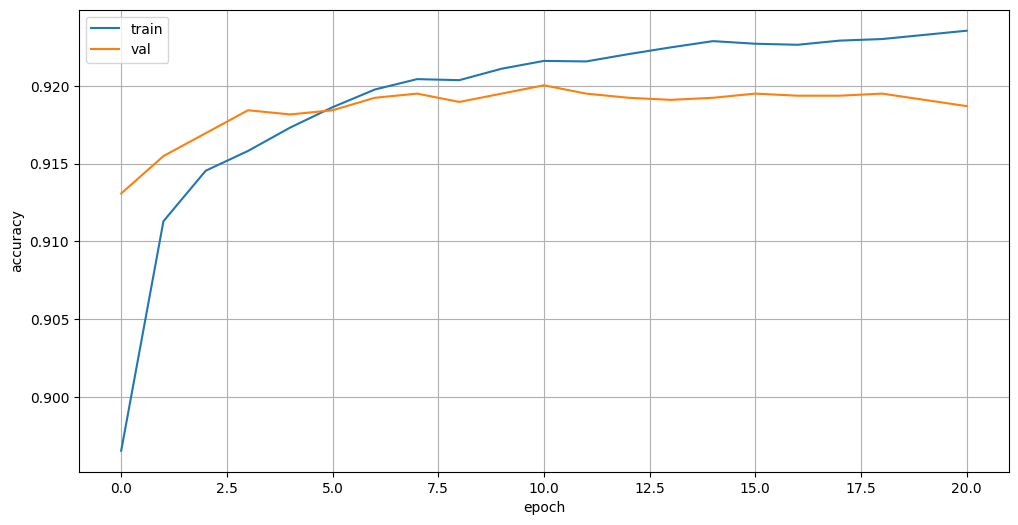

In [54]:
# Crea una nueva figura para la gráfica con un tamaño de 12x6 pulgadas.
plt.figure(figsize=(12,6))

# Grafica la precisión del conjunto de entrenamiento.
# 'history.history['accuracy']' contiene la precisión (accuracy) por cada época en el conjunto de entrenamiento.
plt.plot(history.history['accuracy'])

# Grafica la precisión del conjunto de validación.
# 'history.history['val_accuracy']' contiene la precisión (accuracy) por cada época en el conjunto de validación.
plt.plot(history.history['val_accuracy'])

# Etiqueta del eje X, que representa las épocas (epoch), indicando el número de veces que el modelo ha sido entrenado en los datos.
plt.xlabel('epoch')

# Etiqueta del eje Y, que representa la precisión (accuracy), mostrando cómo la precisión cambia con cada época.
plt.ylabel('accuracy')

# Añade una leyenda a la gráfica para diferenciar entre la precisión del conjunto de entrenamiento ('train') y el de validación ('val').
plt.legend(['train', 'val'])

# Añade una cuadrícula a la gráfica.
plt.grid()


Se grafica la pérdida en los conjuntos de entrenamiento y validación por cada época. Visualizar la pérdida es importante para evaluar el rendimiento del modelo y detectar sobreajuste: si la pérdida en el conjunto de validación comienza a aumentar mientras la pérdida en el conjunto de entrenamiento sigue disminuyendo, esto indica que el modelo está empezando a memorizar los datos de entrenamiento en lugar de generalizar bien.

Al observar la gráfica de **pérdida** (loss) en los conjuntos de **entrenamiento** y **validación**:

1. **Disminución constante de la pérdida en el conjunto de entrenamiento**:
   - La línea azul, que representa la pérdida en el conjunto de entrenamiento, disminuye de manera constante a lo largo de las épocas. Esto indica que el modelo está aprendiendo progresivamente mejor a ajustar los datos del conjunto de entrenamiento.

2. **Estabilización de la pérdida en el conjunto de validación**:
   - La línea naranja, que representa la pérdida en el conjunto de validación, disminuye inicialmente, pero luego se estabiliza en torno a **0.20** a partir de la época 10 aproximadamente. Este comportamiento sugiere que el modelo está **generalizando bien** en las primeras épocas, pero después de cierto punto no mejora en el conjunto de validación.

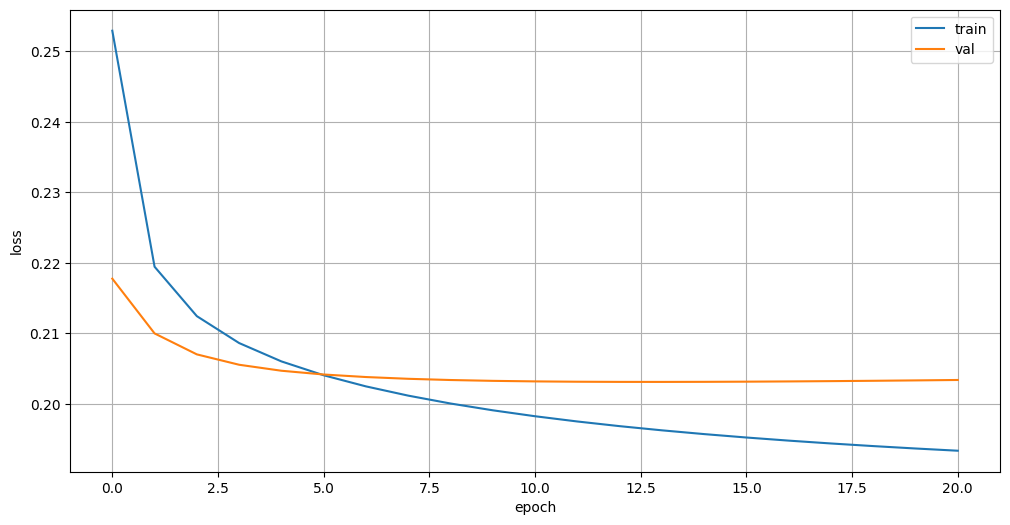

In [55]:
# Crea una nueva figura para la gráfica con un tamaño de 12x6 pulgadas.
plt.figure(figsize=(12,6))

# Grafica la pérdida en el conjunto de entrenamiento.
# 'history.history['loss']' contiene los valores de pérdida calculados durante el entrenamiento por cada época.
plt.plot(history.history['loss'])

# Grafica la pérdida en el conjunto de validación.
# 'history.history['val_loss']' contiene los valores de pérdida calculados para el conjunto de validación por cada época.
plt.plot(history.history['val_loss'])

# Etiqueta del eje X, que representa las épocas (epoch), indicando cuántas veces el modelo ha pasado por el conjunto de datos.
plt.xlabel('epoch')

# Etiqueta del eje Y, que representa la pérdida (loss), mostrando cómo cambia la pérdida con cada época.
plt.ylabel('loss')

# Añade una leyenda para diferenciar entre las líneas que representan la pérdida del conjunto de entrenamiento ('train') y la del conjunto de validación ('val').
plt.legend(['train', 'val'])

# Añade una cuadrícula a la gráfica.
plt.grid()


Se recuperan los pesos y el sesgo aprendidos por la única capa densa del modelo sigmoide.

In [56]:
# 'get_weights()' devuelve los pesos y los sesgos (bias) aprendidos durante el entrenamiento de esa capa.
weights = modelSigmoid.layers[0].get_weights()

# Imprime los pesos y sesgos obtenidos.
print(weights)

[array([[-5.58039919e-02],
       [-1.34952635e-01],
       [-8.17078650e-02],
       [-7.26049691e-02],
       [ 1.21758752e-01],
       [-1.12946652e-01],
       [ 1.50988512e-02],
       [-1.63727608e-02],
       [-1.72642574e-01],
       [-1.72852039e-01],
       [-2.67465591e-01],
       [ 3.43929194e-02],
       [-4.06813808e-02],
       [ 3.14569399e-02],
       [ 8.32875967e-02],
       [-7.15754107e-02],
       [-4.83591706e-02],
       [ 1.50065757e-02],
       [-5.10408171e-02],
       [ 2.51066824e-03],
       [-1.52915910e-01],
       [-3.82652134e-02],
       [-2.99529135e-02],
       [-2.67324969e-02],
       [ 7.05755427e-02],
       [-9.88010168e-02],
       [ 6.20509125e-02],
       [ 1.66277704e-03],
       [ 4.10424434e-02],
       [ 4.00042906e-02],
       [-1.18391532e-02],
       [-5.10251857e-02],
       [-9.57668386e-03],
       [ 1.33072257e-01],
       [ 7.50241056e-02],
       [-1.32579252e-01],
       [-1.77506700e-01],
       [-1.76808387e-01],
       [-2.

Se toman los pesos aprendidos por la capa del modelo, se normaliza al rango de 0 a 255, y se visualiza como una imagen en escala de grises. Esto es útil para entender mejor qué ha aprendido el modelo en términos de cómo pondera las características de entrada. Las áreas más claras o más oscuras en la imagen corresponden a pesos más altos o más bajos, respectivamente.

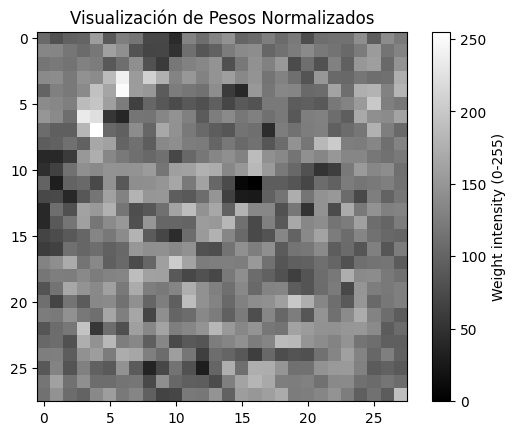

In [57]:
# 'modelSigmoid.layers[0].get_weights()[0]' devuelve la matriz de pesos.
# Los pesos conectan las 784 entradas (píxeles) con la neurona de salida.
weights = modelSigmoid.layers[0].get_weights()[0]

# Convertimos los pesos en un arreglo de NumPy para facilitar su manipulación y posterior procesamiento.
weights = np.array(weights)

# Obtenemos el valor mínimo de los pesos en la matriz para la normalización.
min_weight = np.min(weights)

# Obtenemos el valor máximo de los pesos en la matriz para la normalización.
max_weight = np.max(weights)

# Normalizamos los pesos al rango de 0 a 255.
# Esto se hace restando el valor mínimo de los pesos, dividiendo por el rango (max-min), y luego multiplicando por 255.
# Esta normalización es para visualizar los pesos como una imagen en escala de grises.
normalized_weights = (weights - min_weight) / (max_weight - min_weight) * 255

# 'reshape' convierte el vector plano de 784 elementos (28x28) en una matriz 2D que puede ser visualizada como una imagen.
image_shape = (28, 28)
weights_image = normalized_weights.reshape(image_shape)

# 'imshow' muestra los pesos normalizados como una imagen en escala de grises.
# 'cmap='gray'' asegura que la imagen se renderice en escala de grises.
plt.imshow(weights_image, cmap='gray')

# Añadimos una barra de colores para mostrar la intensidad de los pesos en la imagen.
plt.colorbar(label='Weight intensity (0-255)')

# Añadimos un título a la gráfica para indicar que es la visualización de los pesos normalizados.
plt.title('Visualización de Pesos Normalizados')

# Muestra la imagen generada con la visualización de los pesos de la capa.
plt.show()


Llegó el momento de la evaluación del modelo.

Este modelo ha alcanzado un excelente nivel de precisión en el conjunto de prueba. Con una precisión del 91.76% y una pérdida baja, el modelo parece estar bien ajustado y preparado para hacer predicciones precisas en datos no vistos.

In [58]:
# Evalúa el modelo 'modelSigmoid' utilizando los datos de prueba (X_test, y_test).
# La función 'evaluate' calcula la pérdida (loss) y la precisión (accuracy) del modelo en el conjunto de prueba.
# Esto nos permite ver qué tan bien el modelo generaliza en datos que no ha visto antes.
loss, accuracy = modelSigmoid.evaluate(X_test, y_test)

# Imprime la precisión obtenida en el conjunto de prueba, formateada con 4 decimales para mayor precisión.
print(f"Test Accuracy: {accuracy:.4f}")


293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9152 - loss: 0.2124
Test Accuracy: 0.9176


Se calcula la matriz de confusión, que permite evaluar el rendimiento del modelo al mostrar el número de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

Luego, se utiliza ConfusionMatrixDisplay para visualizar la matriz de confusión en forma de gráfica, lo que facilita la interpretación visual de cómo el modelo está clasificando los datos.

Al observar la **matriz de confusión**, se pueden extraer varias conclusiones sobre el rendimiento del modelo:

### Análisis de la matriz de confusión:

- **Verdaderos negativos (TN)**:
   - **4980** instancias en las que la clase verdadera era **0** y el modelo predijo correctamente **0**. Esto muestra que el modelo clasifica correctamente la mayoría de las instancias de la clase 0.
   
- **Falsos positivos (FP)**:
   - **304** instancias en las que la clase verdadera era **0**, pero el modelo predijo incorrectamente **1**. Estos son errores en los que el modelo ha clasificado instancias de la clase 0 como pertenecientes a la clase 1.
   
- **Falsos negativos (FN)**:
   - **466** instancias en las que la clase verdadera era **1**, pero el modelo predijo incorrectamente **0**. Estos son los errores en los que el modelo ha clasificado instancias de la clase 1 como pertenecientes a la clase 0.
   
- **Verdaderos positivos (TP)**:
   - **3598** instancias en las que la clase verdadera era **1** y el modelo predijo correctamente **1**. Esto muestra que el modelo también clasifica correctamente la mayoría de las instancias de la clase 1.

293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


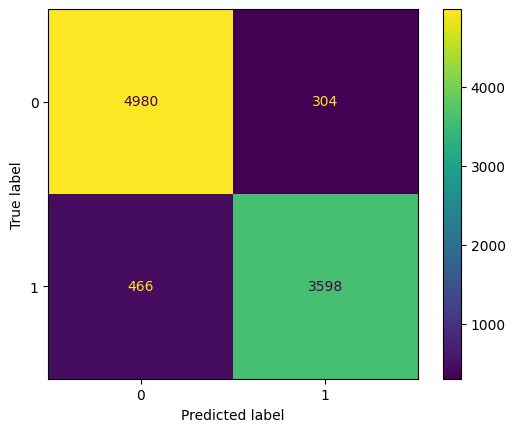

In [59]:
from sklearn.metrics import confusion_matrix
# ' > 0.5' convierte las probabilidades en predicciones binarias: si la probabilidad es mayor a 0.5, se predice 1 (clase positiva); de lo contrario, se predice 0.
y_predictions = modelSigmoid.predict(X_test) > 0.5

# Calcula la matriz de confusión comparando las etiquetas verdaderas (y_test) con las predicciones binarias (y_predictions).
# La matriz de confusión muestra cómo se distribuyen las predicciones correctas e incorrectas del modelo.
c_matrix = confusion_matrix(y_true=y_test, y_pred=y_predictions)

# Crea un objeto 'ConfusionMatrixDisplay' para visualizar la matriz de confusión calculada previamente (c_matrix).
# Esto facilita la interpretación visual de los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.
display_matrix = ConfusionMatrixDisplay(confusion_matrix=c_matrix)

# Traza la matriz de confusión usando matplotlib.
display_matrix.plot()


Se toma la matriz de confusión y se calculan las métricas: precisión general (accuracy), precisión (precision), recall, especificidad (specificity), y F1-score.

Al observar los resultados de las métricas de rendimiento:

### 1. **Precisión General (`Accuracy`)**: **0.917629**
   - La **precisión general** indica que el modelo predice correctamente aproximadamente el **91.76%** de las veces. Este es un valor alto, lo que significa que el modelo tiene un buen rendimiento general y clasifica correctamente la mayoría de las instancias.

### 2. **Precisión (`Precision`)**: **0.922091**
   - La **precisión** mide cuántas de las predicciones positivas hechas por el modelo fueron realmente correctas. En este caso, con un valor de **0.922091** (92.21%), el modelo tiene un buen rendimiento en cuanto a evitar falsos positivos, es decir, cuando predice que algo es positivo, tiene razón la mayor parte del tiempo.

### 3. **Recall (`Sensibilidad o Exhaustividad`)**: **0.885335**
   - El **recall** mide cuántos de los verdaderos positivos fueron correctamente identificados. Con un valor de **0.885335** (88.53%), el modelo está logrando capturar la mayoría de los ejemplos positivos, aunque hay una ligera proporción que el modelo no está detectando (falsos negativos). Un recall alto es importante cuando es crucial detectar todas las instancias positivas.

### 4. **Especificidad (`Specificity`)**: **0.942468**
   - La **especificidad** mide la proporción de verdaderos negativos correctamente clasificados. Con un valor de **0.942468** (94.24%), el modelo tiene una buena capacidad para identificar correctamente los negativos, lo que significa que tiene pocos falsos positivos.

### 5. **F1-Score**: **0.903339**
   - El **F1-Score** es la media armónica entre la precisión y el recall, proporcionando un equilibrio entre ambas métricas. Con un valor de **0.903339** (90.33%), el modelo muestra un buen equilibrio entre precisión y recall, lo que indica que está funcionando bien tanto para capturar instancias positivas como para evitar falsos positivos.

In [60]:
# Define una función para calcular las métricas de rendimiento a partir de una matriz de confusión.
def get_performance_metrics(c_matrix):

    # Extrae los valores de la matriz de confusión:
    # - tn: Verdaderos negativos (True Negatives).
    # - fp: Falsos positivos (False Positives).
    # - fn: Falsos negativos (False Negatives).
    # - tp: Verdaderos positivos (True Positives).
    tn, fp, fn, tp = c_matrix[0][0], c_matrix[0][1], c_matrix[1][0], c_matrix[1][1]

    # Calcula la precisión general (accuracy).
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Calcula la precisión (precision).
    precision = tp / (tp + fp)

    # Calcula el recall (sensibilidad o exhaustividad).
    recall = tp / (tp + fn)

    # Calcula la especificidad (specificity).
    specificity = tn / (tn + fp)

    # Calcula el F1-score.
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Devuelve las métricas calculadas.
    return accuracy, precision, recall, specificity, f1_score

# Llama a la función 'get_performance_metrics' pasando la matriz de confusión 'c_matrix' y asigna los resultados a: precisión general, precisión, recall, especificidad y F1-score.
accuracy, precision, recall, specificity, f1_score = get_performance_metrics(c_matrix)

# Imprime los resultados de las métricas con una precisión de 6 decimales.
print(f"Accuracy: {accuracy:0.6f}")
print(f"Precision: {precision:0.6f}")
print(f"Recall: {recall:0.6f}")
print(f"Specificity: {specificity:0.6f}")
print(f"F1-score: {f1_score:0.6f}")


Accuracy: 0.917629
Precision: 0.922091
Recall: 0.885335
Specificity: 0.942468
F1-score: 0.903339


## Visualización de las predicciones del modelo

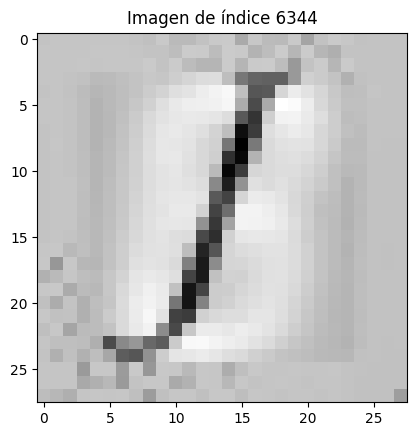

Letra


In [63]:
import random
import numpy as np

# Seleccionar un dato aleatorio del DataFrame X
random_index = random.randint(0, len(X_test) - 1)
random_sample = X_test[random_index]

# Desplegar como imagen (asumiendo que el dato es una imagen plana, como en MNIST)
image_data = np.array(random_sample)  # Convertir a un arreglo de numpy
image_data = image_data.reshape(28, 28)  # Cambiar el tamaño según sea necesario (ejemplo para 28x28)

# Mostrar la imagen
plt.imshow(image_data, cmap='gray')
plt.title(f"Imagen de índice {random_index}")
plt.show()

if y_predictions[random_index]:  # Si la predicción es True
    print("Número")
else:  # Si es False
    print("Letra")

Se compila el modelo modelTanh utilizando el optimizador Adam, la función de pérdida binary_crossentropy, y mide su rendimiento utilizando la métrica de precisión.

In [64]:
# Compila el modelo 'modelTanh', definiendo el optimizador, la función de pérdida y las métricas.
modelTanh.compile(
    optimizer='adam',                   # Se utiliza el optimizador 'adam'.
    loss='binary_crossentropy',          # La función de pérdida 'binary_crossentropy' es adecuada para problemas de clasificación binaria, ya que mide la diferencia entre las predicciones del modelo y las etiquetas verdaderas (0 o 1).
    metrics=['accuracy']                 # Se utiliza la precisión ('accuracy') como métrica de rendimiento, que calcula la proporción de predicciones correctas.
)

Previo al entrenamiento se evalúa el modelo utilizando los datos de prueba y muestra la precisión obtenida.

El modelo no está funcionando bien con una precisión de aproximadamente el 44% y una pérdida alta de 4.8234, resultado esperado, ya que no se ha entrenado.

Después del entrenamiento debería de hacer una mejora de este resultado.

In [65]:
# Evalúa el modelo 'modelTanh' utilizando los datos de prueba (X_test, y_test).
# La función 'evaluate' calcula la pérdida (loss) y la precisión (accuracy) del modelo en el conjunto de prueba.
loss, accuracy = modelTanh.evaluate(X_test, y_test)

# Imprime la precisión obtenida en el conjunto de prueba, formateada con 4 decimales para mayor precisión.
print(f"Test Accuracy: {accuracy:.4f}")

293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4382 - loss: 4.8234
Test Accuracy: 0.4439


Aquí se entrena el modelo modelTanh utilizando EarlyStopping para detener el proceso de entrenamiento cuando la precisión en el conjunto de validación deje de mejorar durante 10 épocas consecutivas. Esto permite evitar el sobreentrenamiento, ahorrando tiempo y garantizando que el modelo use los mejores pesos encontrados durante el entrenamiento.

Al observar los resultados del entrenamiento, se pueden extraer varias conclusiones:

### **1. Precisión en Entrenamiento y Validación**:
- La **precisión** en el conjunto de **entrenamiento** comienza en **90.39%** y varía a lo largo de las épocas, alcanzando valores de hasta **91.59%** en la época 23.
- La **precisión en validación** comienza en **90.77%** y también muestra un incremento, alcanzando un máximo de **91.92%** en algunas épocas, pero también bajando en otras, como se observa en las épocas 15 y 16, donde disminuye drásticamente.

### **2. Pérdida en Entrenamiento y Validación**:
- La **pérdida en entrenamiento** disminuye de **0.7574** en la primera época a **0.6744** en la época 23, lo que indica que el modelo está aprendiendo y ajustando sus pesos durante el entrenamiento.
- Sin embargo, la **pérdida en validación** muestra mvoimientos más notables. Por ejemplo, en la **época 15**, la pérdida en validación sube a **1.0305**, lo que sugiere que el modelo está teniendo problemas en esa fase. Posteriormente, la pérdida disminuye y vuelve a valores más bajos.

In [67]:
# Define el callback EarlyStopping, que detendrá el entrenamiento si la métrica de validación deja de mejorar.
# 'monitor' indica que se observará la métrica 'val_accuracy' (precisión en el conjunto de validación).
# 'patience=10' significa que el entrenamiento se detendrá si no hay mejora en la precisión de validación durante 10 épocas consecutivas.
# 'restore_best_weights=True' asegura que, cuando se detenga el entrenamiento, se restaurarán los pesos del modelo que lograron la mejor precisión de validación.
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Entrena el modelo 'modelTanh' usando los datos de entrenamiento (X_train, y_train).
# 'epochs=500' indica que el modelo intentará entrenar durante un máximo de 500 épocas, pero el EarlyStopping puede detener el entrenamiento antes si no hay mejora.
# 'batch_size=32' especifica que el modelo utilizará lotes de 32 muestras a la vez para actualizar los pesos.
# 'validation_split=0.20' indica que el 20% de los datos de entrenamiento se reservarán para validación y no se utilizarán para ajustar los pesos.
# 'callbacks=[early_stop]' utiliza el callback EarlyStopping para detener el entrenamiento automáticamente si no se detecta mejora en la métrica de validación.
history = modelTanh.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.20, callbacks=[early_stop])

Epoch 1/500
935/935 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9039 - loss: 0.7574 - val_accuracy: 0.9077 - val_loss: 0.6975
Epoch 2/500
935/935 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8960 - loss: 0.8076 - val_accuracy: 0.9028 - val_loss: 0.8332
Epoch 3/500
935/935 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9024 - loss: 0.7655 - val_accuracy: 0.9093 - val_loss: 0.6691
Epoch 4/500
935/935 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9122 - loss: 0.6640 - val_accuracy: 0.9175 - val_loss: 0.6828
Epoch 5/500
935/935 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9111 - loss: 0.6476 - val_accuracy: 0.8970 - val_loss: 0.6263
Epoch 6/500
935/935 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8908 - loss: 0.8238 - val_accuracy: 0.9091 - val_loss: 0.6940
Epoch 7/500
935/935 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9116 - loss: 0.6347 - val_accuracy: 0.9121 - val_loss: 0.6337
Epoch 8/500
935/935 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8636 - loss: 1.0549 - val_accu

Este código calcula la mejor época en la que el modelo alcanzó su máximo rendimiento en el conjunto de validación antes de que EarlyStopping detuviera el entrenamiento. También muestra la mejor precisión en validación alcanzada, lo cual es crucial para evaluar el rendimiento máximo del modelo. Estos resultados te ayudan a entender en qué momento el modelo tuvo su mejor comportamiento y si es necesario realizar ajustes en el entrenamiento o la arquitectura para mejorar dicho rendimiento.

La mejor época se alcanzó en la época 13, lo que indica que el modelo llegó a su mejor rendimiento en términos de precisión de validación bastante temprano en el proceso de entrenamiento. Esto es un signo positivo, ya que no fue necesario entrenar por muchas más épocas, lo cual es eficiente en términos de tiempo y recursos.

La mejor precisión en validación fue de 0.9192 (91.92%). Este es un muy buen valor, ya que sugiere que el modelo es capaz de predecir correctamente casi el 92% de los datos del conjunto de validación. Esto indica que el modelo tiene una buena capacidad de generalización.

In [68]:
# Calcula la mejor época en la que el modelo obtuvo el mejor rendimiento en el conjunto de validación.
# 'early_stop.stopped_epoch' es la época en la que EarlyStopping detuvo el entrenamiento debido a la falta de mejora en la métrica de validación.
# Se resta 'early_stop.patience' (el número de épocas de paciencia que el modelo esperó sin mejorar) y se suma 1 para obtener la época exacta en la que se alcanzó la mejor precisión en validación.
best_epoch = early_stop.stopped_epoch - early_stop.patience + 1

# Imprime la mejor época en la que se obtuvo la mayor precisión en validación.
print(f"Mejor época: {best_epoch}")

# Encuentra la mejor precisión de validación observada durante el entrenamiento.
# Se utiliza 'max' para obtener el valor más alto de 'val_accuracy', que es la lista de precisiones de validación registradas durante el entrenamiento.
best_val_accuracy = max(history.history['val_accuracy'])

# Imprime la mejor precisión en validación obtenida, formateada con 4 decimales para mayor precisión visual.
print(f"Mejor precisión en validación: {best_val_accuracy:.4f}")


Mejor época: 13
Mejor precisión en validación: 0.9192


Se grafica la precisión tanto en el conjunto de entrenamiento como en el conjunto de validación a lo largo de las épocas. Esto es útil para visualizar cómo evoluciona el rendimiento del modelo con el tiempo y para detectar posibles problemas como el sobreajuste.

Al observar la gráfica de precisión para el conjunto de **entrenamiento** y **validación**, se pueden extraer las siguientes conclusiones:

### 1. **Patrón general de entrenamiento**:
   - La precisión en el conjunto de **entrenamiento** y **validación** es **similar** a lo largo de las épocas, lo cual es una buena señal, ya que sugiere que el modelo no está sobreajustando significativamente.

### 2. **Caída repentina en la época 14**:
   - En la **época 14**, la precisión en el conjunto de **validación** cae drásticamente. Esto puede indicar que el modelo enfrentó un conjunto de validación con características más difíciles en esa época o podría deberse a alguna variabilidad en los datos. Sin embargo, es alentador ver que el modelo se **recupera rápidamente** después de esa caída.

### 3. **Estabilidad general**:
   - Exceptuando la caída temporal, la precisión en **validación** se mantiene relativamente estable entre el **88% y 92%**, lo cual indica un buen rendimiento.

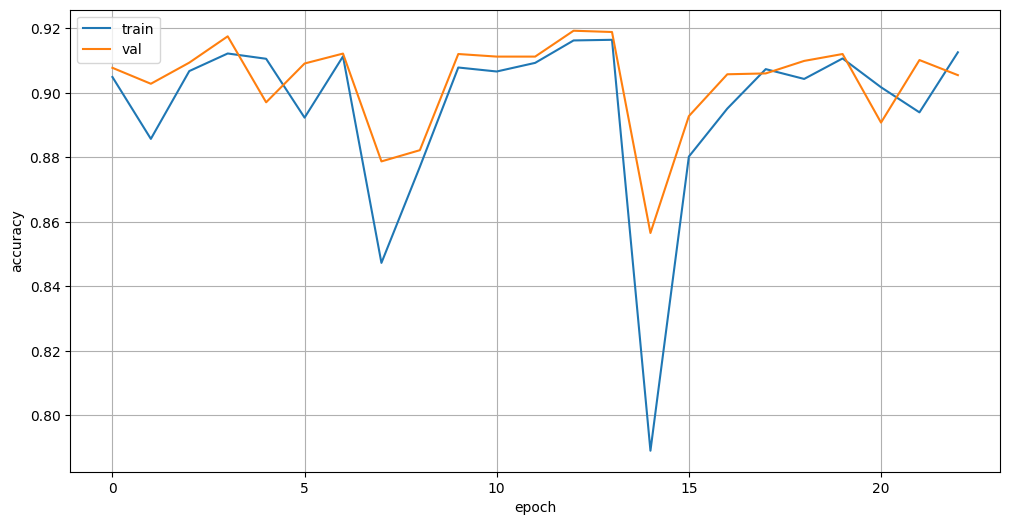

In [69]:
# Crea una nueva figura para la gráfica con un tamaño de 12x6 pulgadas.
plt.figure(figsize=(12,6))

# Grafica los valores de precisión obtenidos durante el entrenamiento.
plt.plot(history.history['accuracy'])

# Grafica los valores de precisión obtenidos durante la validación.
plt.plot(history.history['val_accuracy'])

# Etiqueta del eje X que muestra el número de épocas (epoch), lo que indica cuántas veces el modelo ha pasado por el conjunto de datos.
plt.xlabel('epoch')

# Etiqueta del eje Y que muestra la precisión (accuracy), indicando cómo cambia la precisión en cada época.
plt.ylabel('accuracy')

# Añade una leyenda a la gráfica para diferenciar las curvas de precisión en el conjunto de entrenamiento ('train') y validación ('val').
plt.legend(['train', 'val'])

# Añade una cuadrícula a la gráfica.
plt.grid()


Se grafica la pérdida en los conjuntos de entrenamiento y validación a lo largo de las épocas. Esto es fundamental para evaluar cómo está aprendiendo el modelo y si hay signos de sobreajuste.

Al observar la gráfica de **pérdida** en los conjuntos de **entrenamiento** y **validación**, se pueden hacer las siguientes observaciones:

### 1. **Comportamiento General**:
   - En general, las curvas de pérdida de **entrenamiento** y **validación** son bastante cercanas, lo cual es una buena señal, ya que indica que el modelo está aprendiendo de manera consistente y no hay un sobreajuste significativo. Sin embargo, hay algunas fluctuaciones notables que merecen ser analizadas.

### 2. **Pico dramático en la pérdida de validación en la época 14**:
   - En la **época 14**, la pérdida en el conjunto de **validación** tiene un aumento dramático hasta cerca de **1.8**. Este pico indica que el modelo está luchando con los datos de validación en esa época particular, lo cual podría deberse a una anomalía en los datos de validación o a una inestabilidad en el proceso de entrenamiento.
   
   - Después de este pico, la pérdida de validación **se recupera rápidamente** en las siguientes épocas, lo que es un buen signo, ya que indica que el modelo fue capaz de ajustar correctamente y no quedó atrapado en un mal rendimiento.

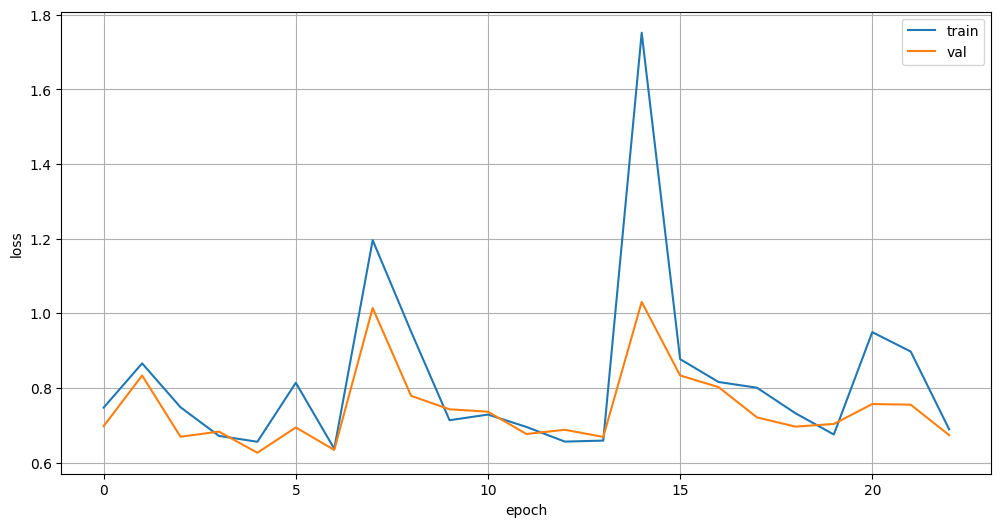

In [70]:
# Crea una nueva figura para la gráfica con un tamaño de 12x6 pulgadas
plt.figure(figsize=(12,6))

# Grafica los valores de pérdida obtenidos durante el entrenamiento.
plt.plot(history.history['loss'])

# Grafica los valores de pérdida obtenidos durante la validación.
plt.plot(history.history['val_loss'])

# Etiqueta del eje X que muestra el número de épocas (epoch), lo que indica cuántas veces el modelo ha pasado por el conjunto de datos.
plt.xlabel('epoch')

# Etiqueta del eje Y que muestra la pérdida (loss), indicando cómo cambia la pérdida en cada época.
plt.ylabel('loss')

# Añade una leyenda a la gráfica para diferenciar las curvas de pérdida en el conjunto de entrenamiento ('train') y validación ('val').
plt.legend(['train', 'val'])

# Añade una cuadrícula a la gráfica.
plt.grid();


Se obtiene y muestra los pesos de la capa del modelo modelTanh.

In [71]:
# 'get_weights()' devuelve una lista que contiene dos elementos:
# 1) Los pesos de la capa.
# 2) El sesgo (bias) de la capa.
weights = modelTanh.layers[0].get_weights()

# Imprime los pesos obtenidos.
print(weights)


[array([[ 2.43133996e-02],
       [-2.03035638e-01],
       [-2.28188932e-02],
       [-1.57781504e-03],
       [ 7.38079324e-02],
       [-1.08925298e-01],
       [-1.07790880e-01],
       [-1.07838899e-01],
       [-7.34854564e-02],
       [-2.38604158e-01],
       [-1.56263351e-01],
       [-9.78040546e-02],
       [ 2.17677020e-02],
       [-1.39780790e-02],
       [-4.95001934e-02],
       [-1.59322143e-01],
       [ 7.68664554e-02],
       [-7.09825987e-03],
       [-1.92458510e-01],
       [ 1.87052861e-02],
       [-4.83849011e-02],
       [-4.62884493e-02],
       [-1.25186518e-01],
       [-9.66152847e-02],
       [ 8.91903713e-02],
       [-1.40475601e-01],
       [ 1.67842973e-02],
       [ 1.04513995e-01],
       [ 8.87018070e-02],
       [-7.22468495e-02],
       [ 5.13224257e-03],
       [-1.98129192e-03],
       [-8.31352994e-02],
       [ 1.14881873e-01],
       [-2.00609933e-03],
       [-8.18462074e-02],
       [-8.66202116e-02],
       [-2.11292893e-01],
       [-2.

Se toman los pesos aprendidos por la capa del modelo, se normaliza al rango de 0 a 255, y se visualiza como una imagen en escala de grises. Esto es útil para entender mejor qué ha aprendido el modelo en términos de cómo pondera las características de entrada. Las áreas más claras o más oscuras en la imagen corresponden a pesos más altos o más bajos, respectivamente.

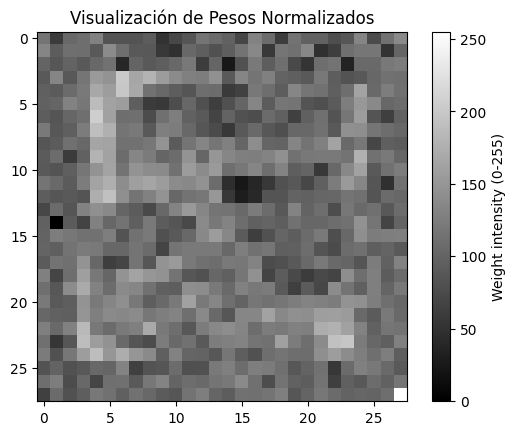

In [72]:
# Obtiene los pesos de la primera capa del modelo 'modelTanh'.
# 'modelTanh.layers[0].get_weights()[0]' devuelve la matriz de pesos, que conecta las 784 entradas (28x28 píxeles) con la primera capa densa.
weights = modelTanh.layers[0].get_weights()[0]

# Convierte los pesos en un arreglo de NumPy para facilitar el procesamiento y las operaciones matemáticas necesarias.
weights = np.array(weights)

# Calcula el valor mínimo de los pesos. Esto se usa para normalizar los pesos más adelante.
min_weight = np.min(weights)

# Calcula el valor máximo de los pesos, que también es necesario para la normalización.
max_weight = np.max(weights)

# Normaliza los pesos al rango de 0 a 255.
# La normalización se realiza restando el valor mínimo de cada peso, dividiendo por la diferencia entre el valor máximo y el mínimo, y luego multiplicando por 255.
# Esto permite que los valores de los pesos se ajusten al rango típico de una imagen en escala de grises (0-255).
normalized_weights = (weights - min_weight) / (max_weight - min_weight) * 255

# Define las dimensiones de la imagen como 28x28.
image_shape = (28, 28)

# Convierte la matriz de pesos normalizados en una imagen 2D de 28x28 píxeles, lo que permitirá visualizar los pesos en forma de imagen.
weights_image = normalized_weights.reshape(image_shape)

# Visualiza la imagen usando Matplotlib.
# 'imshow' muestra la imagen generada a partir de los pesos, y 'cmap='gray'' asegura que se use una escala de grises para representar los valores.
plt.imshow(weights_image, cmap='gray')

# Añade una barra de colores para visualizar la intensidad de los pesos normalizados (rango de 0 a 255).
plt.colorbar(label='Weight intensity (0-255)')

# Añade un título a la imagen que indica que se están visualizando los pesos normalizados.
plt.title('Visualización de Pesos Normalizados')

# Muestra la imagen con los pesos visualizados.
plt.show()


Al observar los resultados de la evaluación del modelo:

1. **Precisión en el conjunto de prueba (`accuracy`)**: **0.9141** (91.41%)
   - La precisión en el conjunto de prueba es **91.41%**, lo que indica que el modelo predice correctamente el **91.41%** de las instancias en el conjunto de datos de prueba.

2. **Pérdida en el conjunto de prueba (`loss`)**: **0.7363**
   - La **pérdida** es de **0.7363**, lo cual es un valor aceptable, pero no extremadamente bajo. Aunque la pérdida no es tan baja como podría ser, lo más importante aquí es que la precisión es alta. La pérdida mide la distancia entre las predicciones del modelo y las etiquetas reales, por lo que siempre queremos que sea lo más baja posible. No obstante, dado que la precisión es alta, la pérdida parece estar bajo control.

In [73]:
# Evalúa el modelo 'modelTanh' utilizando los datos de prueba (X_test, y_test).
# La función 'evaluate' calcula la pérdida (loss) y la precisión (accuracy) del modelo en el conjunto de prueba.
loss, accuracy = modelTanh.evaluate(X_test, y_test)

# Imprime la precisión obtenida en el conjunto de prueba, formateada con 4 decimales para mayor precisión visual.
print(f"Test Accuracy: {accuracy:.4f}")


293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9141 - loss: 0.7363
Test Accuracy: 0.9188


Se calcula la matriz de confusión, que permite evaluar el rendimiento del modelo al mostrar el número de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

Luego, se utiliza ConfusionMatrixDisplay para visualizar la matriz de confusión en forma de gráfica, lo que facilita la interpretación visual de cómo el modelo está clasificando los datos.

Al observar la **matriz de confusión** generada, se pueden extraer las siguientes conclusiones sobre el rendimiento del modelo:

### 1. **Verdaderos negativos (TN)**: **4968**
   - El modelo clasificó correctamente **4968** instancias de la clase **0** (negativa), lo que indica que el modelo tiene una buena capacidad para identificar correctamente los negativos.
   
### 2. **Falsos positivos (FP)**: **316**
   - El modelo clasificó incorrectamente **316** instancias de la clase **0** como **1** (positiva).
   
### 3. **Verdaderos positivos (TP)**: **3621**
   - El modelo identificó correctamente **3621** instancias de la clase **1** (positiva), lo que sugiere que también tiene una buena capacidad para clasificar correctamente los positivos.
   
### 4. **Falsos negativos (FN)**: **443**
   - El modelo clasificó incorrectamente **443** instancias de la clase **1** como **0** (negativa). Estos son casos donde el modelo no logró identificar correctamente la clase positiva y predijo erróneamente la clase negativa.

293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


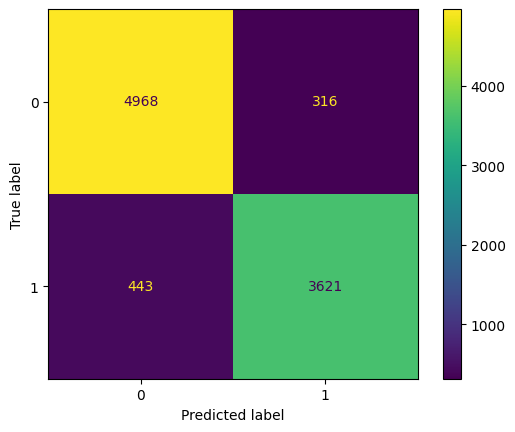

In [74]:
# Realiza predicciones en el conjunto de prueba (X_test) usando el modelo 'modelTanh'.
# 'modelTanh.predict(X_test)' devuelve probabilidades, ya que la activación de la capa de salida es 'sigmoid'.
# El resultado será un valor entre 0 y 1. Al utilizar ' > 0.5', convierte esas probabilidades en predicciones binarias:
# Si la probabilidad es mayor a 0.5, el resultado será True (clase 1); si es menor o igual a 0.5, el resultado será False (clase 0).
y_predictions = modelTanh.predict(X_test) > 0.5

# Calcula la matriz de confusión comparando las etiquetas verdaderas (y_test) con las predicciones binarias (y_predictions).
# 'confusion_matrix' devuelve una matriz que compara las predicciones del modelo con los valores reales,
# mostrando el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.
c_matrix = confusion_matrix(y_true=y_test, y_pred=y_predictions)

# Crea un objeto 'ConfusionMatrixDisplay' para visualizar la matriz de confusión.
# 'ConfusionMatrixDisplay' facilita la representación visual de la matriz de confusión, mostrando cómo el modelo clasificó los datos.
display_matrix = ConfusionMatrixDisplay(confusion_matrix=c_matrix)

# Dibuja la matriz de confusión.
# Esto muestra gráficamente la matriz de confusión para que puedas ver las clasificaciones correctas e incorrectas del modelo.
display_matrix.plot()


Se toma la matriz de confusión y se calculan las métricas: precisión general (accuracy), precisión (precision), recall, especificidad (specificity), y F1-score.

Al observar los resultados de las métricas de rendimiento:

### 1. **Precisión General (`Accuracy`)**: **0.918806** (~91.88%)
   - La precisión general es aproximadamente **91.88%**, lo que indica que el modelo clasifica correctamente el **91.88%** de las instancias. Este es un buen resultado y muestra que el modelo es eficaz en general.

### 2. **Precisión (`Precision`)**: **0.919736** (~91.9736%)
   - La precisión mide cuántas de las predicciones positivas realizadas por el modelo fueron realmente correctas. Un valor de **91.97%** es muy bueno, lo que significa que el modelo tiene un bajo número de **falsos positivos**, es decir, cuando predice una clase positiva, tiene razón la mayor parte del tiempo.

### 3. **Recall (`Recall`)**: **0.890994** (~89.10%)
   - El recall (también conocido como **sensibilidad**) mide cuántos de los verdaderos positivos fueron correctamente identificados por el modelo. Un valor de **89.10%** indica que el modelo tiene un bajo número de **falsos negativos**, es decir, detecta la mayoría de las instancias positivas, aunque hay algunas que se le escapan.

### 4. **Especificidad (`Specificity`)**: **0.940197** (~94.02%)
   - La **especificidad** mide cuántos de los verdaderos negativos fueron correctamente clasificados por el modelo. Un valor de **94.02%** es excelente, lo que indica que el modelo también es muy bueno en la identificación de instancias negativas, con pocos **falsos positivos**.

### 5. **F1-Score**: **0.905137** (~90.51%)
   - El **F1-score** es la media armónica entre precisión y recall, y es particularmente útil cuando hay un desequilibrio entre las clases. Un valor de **90.51%** indica que el modelo mantiene un buen equilibrio entre la precisión y el recall, lo que sugiere que está funcionando bien tanto para minimizar los falsos positivos como los falsos negativos.

In [75]:
# Define una función que toma la matriz de confusión 'c_matrix' como entrada y calcula varias métricas de rendimiento del modelo.
def get_performance_metrics(c_matrix):
    # Extrae los valores de la matriz de confusión:
    # - tn: Verdaderos negativos (True Negatives).
    # - fp: Falsos positivos (False Positives).
    # - fn: Falsos negativos (False Negatives).
    # - tp: Verdaderos positivos (True Positives).
    tn, fp, fn, tp = c_matrix[0][0], c_matrix[0][1], c_matrix[1][0], c_matrix[1][1]

    # Calcula la precisión general (accuracy).
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Calcula la precisión (precision).
    precision = tp / (tp + fp)

    # Calcula el recall (sensibilidad o exhaustividad).
    recall = tp / (tp + fn)

    # Calcula la especificidad (specificity).
    specificity = tn / (tn + fp)

    # Calcula el F1-score.
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Retorna las métricas calculadas: precisión general, precisión, recall, especificidad y F1-score.
    return accuracy, precision, recall, specificity, f1_score

# Llama a la función 'get_performance_metrics' pasando la matriz de confusión 'c_matrix' y asigna los resultados de precisión general, precisión, recall, especificidad y F1-score.
accuracy, precision, recall, specificity, f1_score = get_performance_metrics(c_matrix)

# Imprimir métricas
print(f"Accuracy: {accuracy:0.6f}")
print(f"Precision: {precision:0.6f}")
print(f"Recall: {recall:0.6f}")
print(f"Specificity: {specificity:0.6f}")
print(f"F1-score: {f1_score:0.6f}")

Accuracy: 0.918806
Precision: 0.919736
Recall: 0.890994
Specificity: 0.940197
F1-score: 0.905137


Accuracy: 0.916346
Precision: 0.919264
Recall: 0.885335
Specificity: 0.940197
F1-score: 0.901980

### Visualización de las predicciones del modelo.

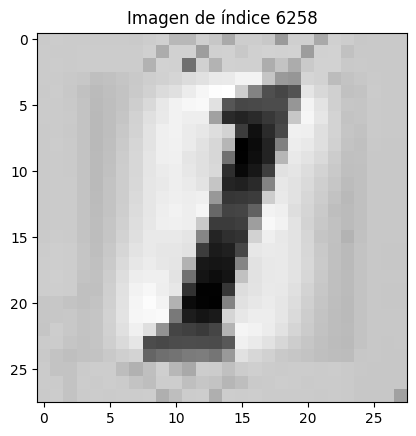

Número


In [77]:
# Seleccionar un dato aleatorio del DataFrame X
random_index = random.randint(0, len(X_test) - 1)
random_sample = X_test[random_index]

# Desplegar como imagen (asumiendo que el dato es una imagen plana, como en MNIST)
image_data = np.array(random_sample)  # Convertir a un arreglo de numpy
image_data = image_data.reshape(28, 28)  # Cambiar el tamaño según sea necesario (ejemplo para 28x28)

# Mostrar la imagen
plt.imshow(image_data, cmap='gray')
plt.title(f"Imagen de índice {random_index}")
plt.show()

if y_predictions[random_index]:  # Si la predicción es True
    print("Número")
else:  # Si es False
    print("Letra")

## Decision del modelo


Debido a las métricas y los comportamientos de los modelos se identificó que el primer modelo (el que usa la función sigmoidal) tuvo un mejor rendimiento. El modelo de la tangente hiperbólica también puede ser utilizado pero mostró comportamientos irregulares en las distintas épocas mostrando diferencias significativas entre la validación de una y otra.

## Discusiones y Conclusiones



**1.	Discuss about the limitations of a single-neuron network in complex tasks.**



Se pueden detallar varias limitaciones de un modelo de una sola neurona. Un perceptrón simple solo puede separar datos que son linealmente separables. Esto significa que si los datos de entrada no pueden dividirse con una línea recta (o hiperplano en espacios de mayor dimensión), la red no podrá clasificarlos correctamente. La estructura de una red de una sola neurona no permite el aprendizaje de características complejas. En tareas complejas, como la clasificación de imágenes, se requiere la extracción de características avanzadas a través de varias capas de procesamiento. Una red de una sola neurona no tiene la capacidad para realizar esta extracción jerárquica de características, lo que en algunos casos la hace inadecuada para estas tareas. En tareas de predicción o regresión complejas, la salida de una sola neurona no puede modelar relaciones complejas entre las variables de entrada y salida. Para modelar adecuadamente funciones complejas, se necesitan redes neuronales profundas con múltiples capas, donde las neuronas intermedias pueden aprender representaciones no lineales más sofisticadas.

**2. Was the perceptron model able to capture the relationship between inputs and outputs in your use case application?**



En este caso, dado que las métricas resultantes fueron bastante buenas, se puede argumentar que el modelo de perceptrón logró capturar al menos de manera adecuada la relación entre los datos de entrada y salida en la aplicación específica. Aunque, como discutido previamente, un perceptrón de una sola neurona tiene limitaciones inherentes en su capacidad de representar relaciones complejas, parece que en este escenario particular los datos pueden ser lo suficientemente simples o bien distribuidos como para que un modelo lineal capture patrones útiles.

El buen rendimiento en métricas como precisión, recall o f1-score sugiere que el modelo fue capaz de identificar correctamente las clases presentes, incluso si los datos no eran completamente lineales. Sin embargo, es importante señalar que aunque los resultados fueron buenos, esto no implica que el perceptrón haya aprendido todos los detalles complejos de las relaciones entre las entradas y las salidas. Lo más probable es que, en este caso, las transformaciones básicas o las características intrínsecas de los datos hayan permitido al modelo extraer información relevante.


**3.	Was the perceptron model able to learn faster for larger values of the learning rate?**


Tomando en consideración lo visto con el modelo sigmoide, se puede observar que este probablemente aprendió rápidamente durante las primeras épocas, lo que es típico de tasas de aprendizaje relativamente altas. La rápida convergencia a un buen rendimiento en una época temprana sugiere que el modelo estaba capturando las relaciones importantes en los datos de manera eficiente. Sin embargo, el hecho de que el proceso se haya detenido en la época 19 y el mejor modelo sea el de la época 9 podría indicar que una tasa de aprendizaje más alta no permitió seguir mejorando el rendimiento. Esto podría ser porque el modelo ya alcanzó su mejor rendimiento temprano, o debido a que una tasa de aprendizaje más alta provocó inestabilidad o sobreajuste más adelante en el entrenamiento.

Por lo tanto, sí, el modelo fue capaz de aprender rápidamente con una tasa de aprendizaje alta, pero también es posible que una tasa muy alta haya provocado una disminución de la capacidad del modelo para mejorar más allá de la época 9, lo que sugiere que un valor más moderado de la tasa de aprendizaje podría haber permitido un aprendizaje más estable.

**4. Was it necessary to normalise/scale the predictor variables? why?**

Sí fue necesario normalizar las variables predictoras debido a la utilización de funciones de activación como sigmoide y tanh. La normalización es fundamental cuando se emplean estas funciones, ya que ambas comprimen las salidas a rangos específicos: sigmoide entre 0 y 1, y tanh entre -1 y 1. Si las características no se escalan, los valores de entrada pueden ser demasiado grandes o pequeños, lo que lleva a una saturación de las funciones de activación. Esto significa que las salidas se acercan a los extremos de sus respectivos rangos, provocando gradientes muy pequeños, lo que dificulta o incluso impide que el modelo aprenda de manera efectiva.

Se realizó la normalización utilizando la clase StandardScaler, lo que ajusta las características para que tengan una media de 0 y una desviación estándar de 1. Esto evita que los valores extremos afecten el proceso de entrenamiento y ayuda a que las funciones de activación operen dentro de sus rangos óptimos, evitando problemas. Además, al normalizar las características, el algoritmo de optimización puede converger de manera más rápida y eficiente, lo que es crucial en modelos con funciones de activación no lineales como las que utilizaste.El proceso de normalización también asegura que tanto los datos de entrenamiento como los de prueba se escalen de manera coherente, lo cual mejora la estabilidad del modelo y evita problemas de generalización.

**5. What strategies did you follow to tune the training hyperparameters?**

Para ajustar los hiperparámetros, se utilizó el optimizador Adam, conocido por su capacidad adaptativa y eficiente en la actualización de gradientes, junto con la función de pérdida binary_crossentropy, apropiada para problemas de clasificación binaria. Se configuraron 500 épocas para permitir un entrenamiento completo, pero se implementó early stopping para detener el proceso cuando la precisión en el conjunto de validación dejaba de mejorar durante 10 épocas, evitando el sobreentrenamiento y restaurando los mejores pesos obtenidos.

Además, se empleó un validation_split del 20% para reservar una porción de los datos de entrenamiento y evaluar el rendimiento del modelo en datos no vistos, mejorando la capacidad de generalización. Por último, se utilizó un tamaño de batch de 32, un valor estándar que permite un balance entre la estabilidad de las actualizaciones y la eficiencia del entrenamiento. Estas estrategias permitieron ajustar los hiperparámetros de manera eficiente, maximizando tanto la precisión como la generalización del modelo.

**6. Did the learning process always converge? if not, what was the reason why it failed to do so?**

Nuevamente tomando en cuenta la función sigmoide que es la que arrojó resultados mejores. El proceso de aprendizaje no siempre converge completamente. Aunque la precisión en validación se mantiene alta (entre 0.89 y 0.92), la gráfica muestra que después de épocas tempranas, tanto la precisión como la pérdida en validación dejan de mejorar significativamente. Esto sugiere que el modelo alcanzó un límite en su capacidad de generalización.

La razón principal por la cual el proceso de aprendizaje no convergió totalmente parece ser un ligero sobreajuste: el modelo sigue mejorando en los datos de entrenamiento, pero ya no mejora en los datos de validación.

**7. What improvement can be adopted to solve the use case application more efficiently and robustly? e.g., using a multi-layer network, why?**

Para mejorar la eficiencia y robustez del perceptrón que clasifica entre letras y números, es recomendable utilizar una red neuronal multicapa (MLP) o una red convolucional (CNN), ya que estas pueden capturar relaciones no lineales y patrones más complejos en las imágenes, mejorando la generalización del modelo.

También es necesario aplicar técnicas más avanzadas de data augmentation (como rotaciones, escalado y cambios en el brillo) para aumentar y diversificar los datos, especialmente los números, lo cual ayudará a mitigar el desbalance de clases. El uso de métricas como el F1-score es más adecuado en este escenario desbalanceado, ya que captura mejor el equilibrio entre precisión y recall.

El ajuste de hiperparámetros, como la tasa de aprendizaje y el optimizador, puede mejorar el rendimiento del modelo, mientras que implementar técnicas de regularización como dropout o L2 regularization evitará el sobreajuste. Finalmente, utilizar funciones de activación modernas como ReLU puede facilitar la convergencia y mejorar la eficiencia en redes más profundas.



**8. Provide personal conclusions about what you have achieved in this project.**

En este proyecto, se lograron importantes aprendizajes relacionados con las capacidades y limitaciones de un perceptrón de una sola neurona para la clasificación de letras y números. A pesar de las limitaciones inherentes de este tipo de modelo, como su incapacidad para manejar datos que no sean linealmente separables, el modelo fue capaz de ofrecer un rendimiento notablemente bueno en las métricas evaluadas. Esto sugiere que, en este caso, los datos presentados al modelo eran lo suficientemente simples para que el perceptrón pudiera capturar patrones relevantes.
Uno de los aspectos más importantes logrados fue la capacidad del modelo para adaptarse a los datos, alcanzando métricas como la precisión y el F1-score de manera eficiente. A través del uso de técnicas como la normalización de las características y el ajuste de hiperparámetros, fue posible optimizar el rendimiento del modelo y prevenir el sobreajuste, lo que demuestra un buen entendimiento de los procesos de entrenamiento y generalización.
Otro logro fue la implementación de estrategias adecuadas como el uso del optimizador Adam y early stopping, lo cual permitió un entrenamiento eficiente. Estas técnicas aseguraron que el modelo no continuara entrenando innecesariamente cuando ya no se observaban mejoras significativas en el conjunto de validación.


## Referencias

* Alavala, C. R. (2008). Fuzzy logic and neural networks : Basic concepts & application. New Age International Ltd.

* Daniel, G. (2007). Principles of artificial neural networks (2nd edition). World Scientific Publishing Company.

* Dobson, J. E. (2023). The birth of computer vision. University of Minnesota Press.

* Hackeling, G. (2017). Mastering machine learning with scikit-learn - second edition : Use scikit-learn to apply machine learning to real-world problems. Packt Publishing, Limited.



## Código de Honor
Damos nuestra palabra que hemos realizado con integridad académica.